# **BigMart Sales Dataset**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.

This dataset has 8,523 records under 12 attributes.

*   ***`Item_Identifier`*** - Unique Product ID
*   ***`Item_Weight`*** - Weight of product
*   ***`Item_Fat_Content`*** - Whether the product is low fat or not
*   ***`Item_Visibility`*** - The % of total display area of all similar products in a store
*   ***`Item_Type`*** - Product Category
*   ***`Item_MRP`*** - Maximum Retail Price for a Product
*   ***`Outlet_Identifier`*** - Unique store ID
*   ***`Outlet_Establishment_Year`*** - The year in which store was established
*   ***`Outlet_Size`*** - The size of the store (Area Size Category)
*   ***`Outlet_Location_Type`*** - The type of city in which the store is located
*   ***`Outlet_Type`*** - Grocery store or a type of supermarket
*   ***`Item_Outlet_Sales`*** - Sales of the product in the particular store **(Ground truth)**

# EDA

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [62]:
#!pip install gdown
!gdown --id 1zhJx9gVsZjvMs-vlVHzLxqnRyDpdiHgS
data = pd.read_csv("/content/Train.csv")
data

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zhJx9gVsZjvMs-vlVHzLxqnRyDpdiHgS
To: /content/Train.csv
100% 870k/870k [00:00<00:00, 121MB/s]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.138"
1,DRC01,5.920,Regular,0.019,Soft Drinks,48.269,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.500,Low Fat,0.017,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.270"
3,FDX07,19.200,Regular,0.000,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.380
4,NCD19,8.930,Low Fat,0.000,Household,53.861,OUT013,1987,High,Tier 3,Supermarket Type1,994.705
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.057,Snack Foods,214.522,OUT013,1987,High,Tier 3,Supermarket Type1,"2,778.383"
8519,FDS36,8.380,Regular,0.047,Baking Goods,108.157,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.285
8520,NCJ29,10.600,Low Fat,0.035,Health and Hygiene,85.122,OUT035,2004,Small,Tier 2,Supermarket Type1,"1,193.114"
8521,FDN46,7.210,Regular,0.145,Snack Foods,103.133,OUT018,2009,Medium,Tier 3,Supermarket Type2,"1,845.598"


In [63]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,"7,060.000",8523,"8,523.000",8523,"8,523.000",8523,"8,523.000",6113,8523,8523,"8,523.000"
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.858,NaN,0.066,NaN,140.993,NaN,"1,997.832",NaN,NaN,NaN,"2,181.289"
std,NaN,4.643,NaN,0.052,NaN,62.275,NaN,8.372,NaN,NaN,NaN,"1,706.500"
min,NaN,4.555,NaN,0.000,NaN,31.290,NaN,"1,985.000",NaN,NaN,NaN,33.290
25%,NaN,8.774,NaN,0.027,NaN,93.826,NaN,"1,987.000",NaN,NaN,NaN,834.247
50%,NaN,12.600,NaN,0.054,NaN,143.013,NaN,"1,999.000",NaN,NaN,NaN,"1,794.331"
75%,NaN,16.850,NaN,0.095,NaN,185.644,NaN,"2,004.000",NaN,NaN,NaN,"3,101.296"


> Since **Item_Identifier** and **Outlet_Identifier** are ID in nature, can't be effective in the model training. Thus, these columns should be removed.

In [64]:
data=data.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

> There are **9 features** in this dataset.

In [65]:
print(data.shape)
print(data.dtypes)
data.info()

(8523, 10)
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   ob

In [66]:
data.duplicated().sum()

0

## Visualization numerical features

In [67]:
# separation dataset to nominal and numerical datasets for visualization
df1 = data.select_dtypes(include='number')
#df1 = numerical

df2 = data.select_dtypes(exclude='number')
#df2 = nominal

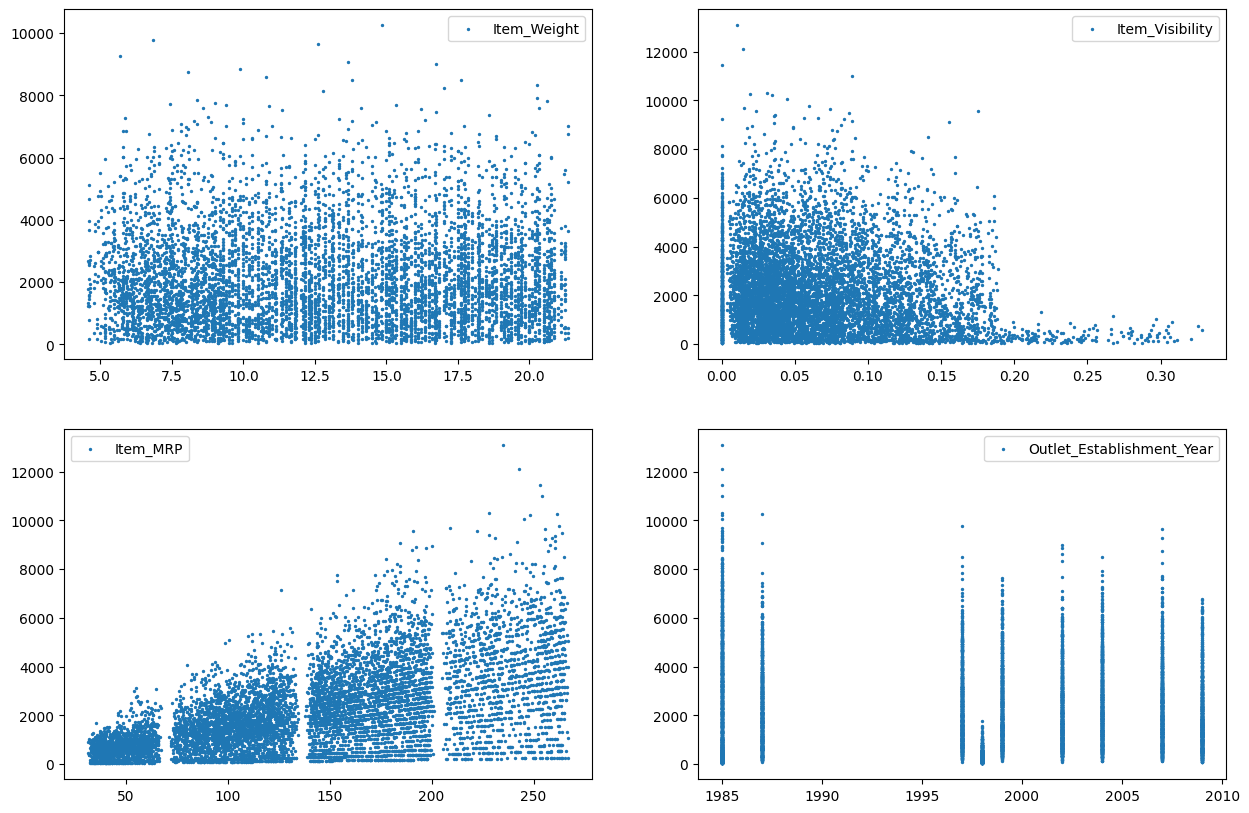

In [68]:
# all numerical features against the ground truth
plt.figure(figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.scatter(df1.iloc[:,i], df1["Item_Outlet_Sales"], s=2, label=df1.columns[i])
    plt.legend(loc='best')

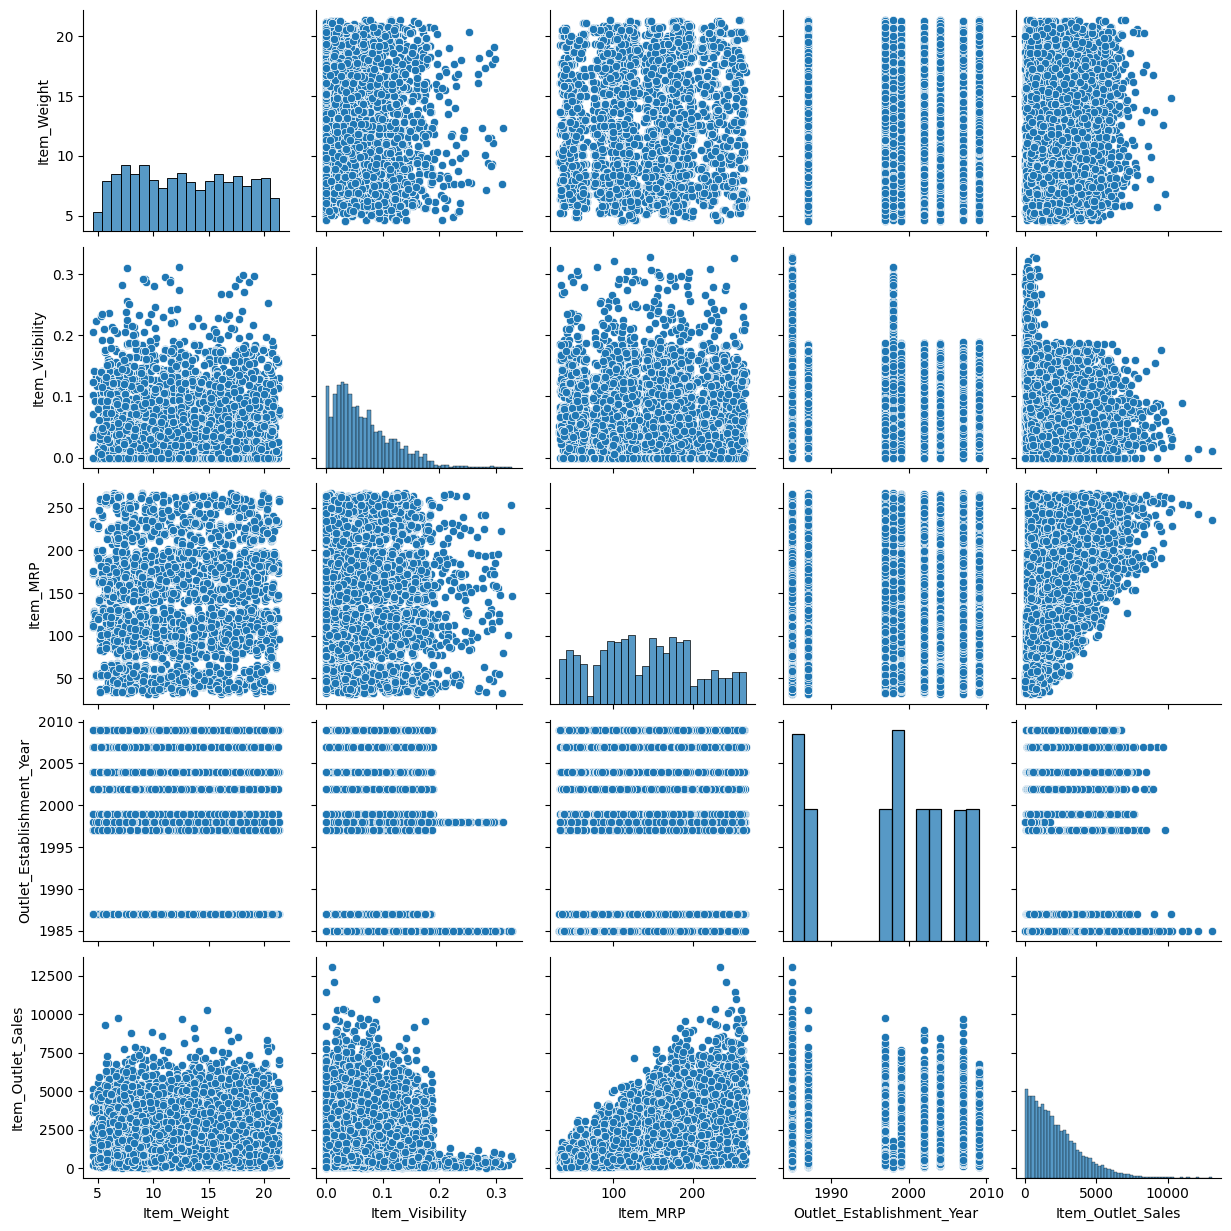

In [69]:
# Visualizing the data using seaborn Pairplots
g = sns.pairplot(df1)

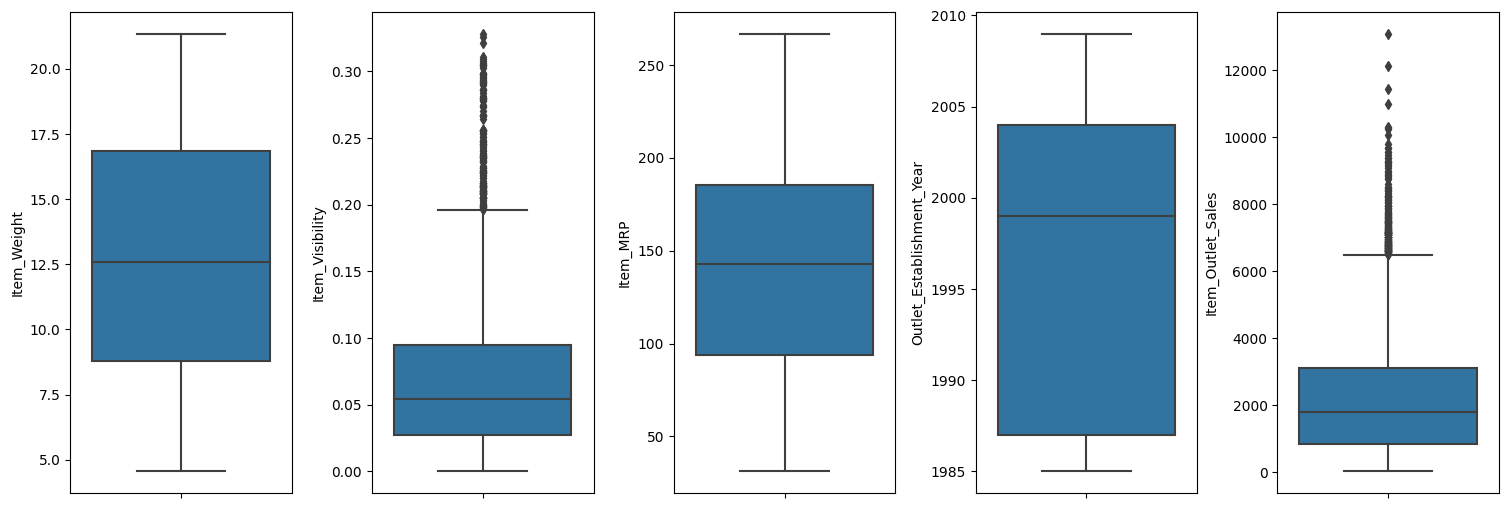

In [70]:
# boxplot
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(15, 5))
index = 0
axs = axs.flatten()
for k,v in df1.items():
    sns.boxplot(y=k, data=df1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



> According to boxplot charts, we can understand that **Item_Visibility** and **Item_Outlet_Sales** have **outlier data**.



The following two cells show the amount and percentage of outlier data in each feature.

It should be mentioned that it was decided not to remove outlier data and they can affect the model training.

In [71]:
# outlier data
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [72]:
# outlier data
for k, v in df1.items():
        outliers = find_outliers_IQR(v)
        perc = len(find_outliers_IQR(v)) * 100.0 / np.shape(df1)[0]

        print("Column %s number of outliers = %d" % (k, len(outliers)))

        print("Column %s max outlier value=" %(k) , outliers.max())

        print("Column %s min outlier value=" %(k) , outliers.min())

        print("Column %s outliers = %.2f%%" % (k, perc))

        print("\n")

Column Item_Weight number of outliers = 0
Column Item_Weight max outlier value= nan
Column Item_Weight min outlier value= nan
Column Item_Weight outliers = 0.00%


Column Item_Visibility number of outliers = 144
Column Item_Visibility max outlier value= 0.328390948
Column Item_Visibility min outlier value= 0.196438668
Column Item_Visibility outliers = 1.69%


Column Item_MRP number of outliers = 0
Column Item_MRP max outlier value= nan
Column Item_MRP min outlier value= nan
Column Item_MRP outliers = 0.00%


Column Outlet_Establishment_Year number of outliers = 0
Column Outlet_Establishment_Year max outlier value= nan
Column Outlet_Establishment_Year min outlier value= nan
Column Outlet_Establishment_Year outliers = 0.00%


Column Item_Outlet_Sales number of outliers = 186
Column Item_Outlet_Sales max outlier value= 13086.9648
Column Item_Outlet_Sales min outlier value= 6503.5344
Column Item_Outlet_Sales outliers = 2.18%




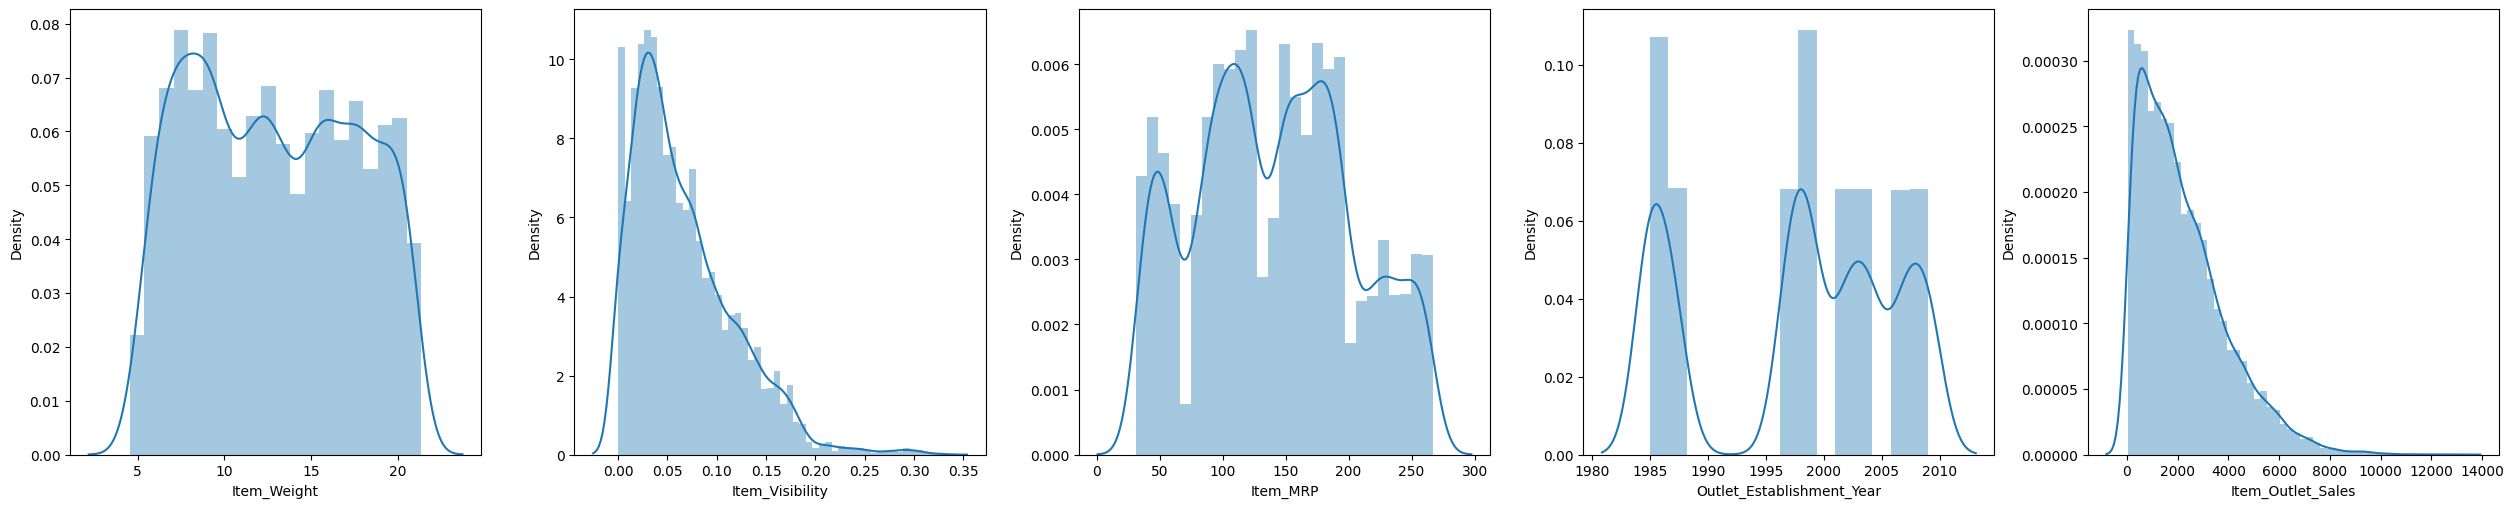

In [73]:
#distribution plot
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(25, 5))
index = 0
axs = axs.flatten()
#distplot = distribution plot
for k,v in df1.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Visualization nominal features

In [74]:
df2.nunique()

Item_Fat_Content         5
Item_Type               16
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


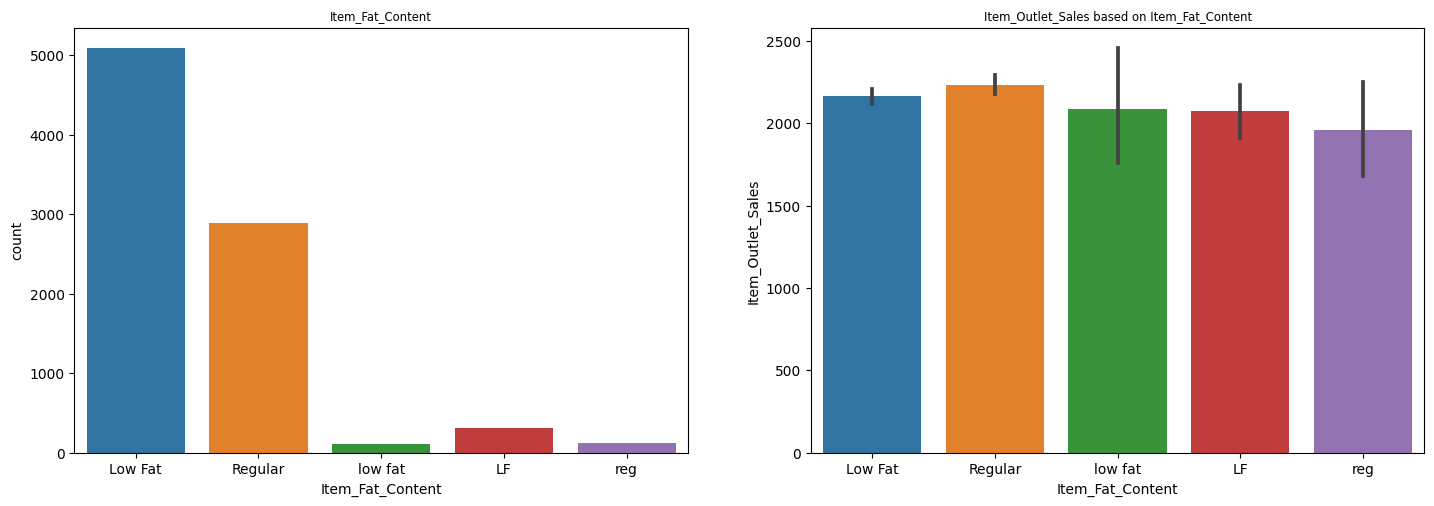

In [75]:
# Visualization Item_Fat_Content feature
plt.figure(figsize=(15, 5))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(121)
plt.title("Item_Fat_Content", fontsize="small")
histo = data["Item_Fat_Content"].value_counts()
print(histo)
sns.countplot(x = data["Item_Fat_Content"])
fig = plt.gcf()

plt.subplot(122)
plt.title("Item_Outlet_Sales based on Item_Fat_Content", fontsize="small")
sns.barplot(data, x=data["Item_Fat_Content"], y=data["Item_Outlet_Sales"])
fig = plt.gcf()


> According to  above chart:
*   **"Low Fat"**, **"low fat"**, and **"LF"** columns have the same concept. Thus, These categorical values should be represented by one concept (***Low Fat***)
---
*   **"Regular"**, and **"reg"** columns have the same concept. Thus, These categorical values should be represented by one concept (***Regular***)

In [76]:
# feature engineering
df2.Item_Fat_Content=df2.Item_Fat_Content.map({'Low Fat':'Low Fat', 'low fat':'Low Fat', 'LF':'Low Fat', 'Regular':'Regular', 'reg':'Regular'})
data.Item_Fat_Content=data.Item_Fat_Content.map({'Low Fat':'Low Fat', 'low fat':'Low Fat', 'LF':'Low Fat', 'Regular':'Regular', 'reg':'Regular'})

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


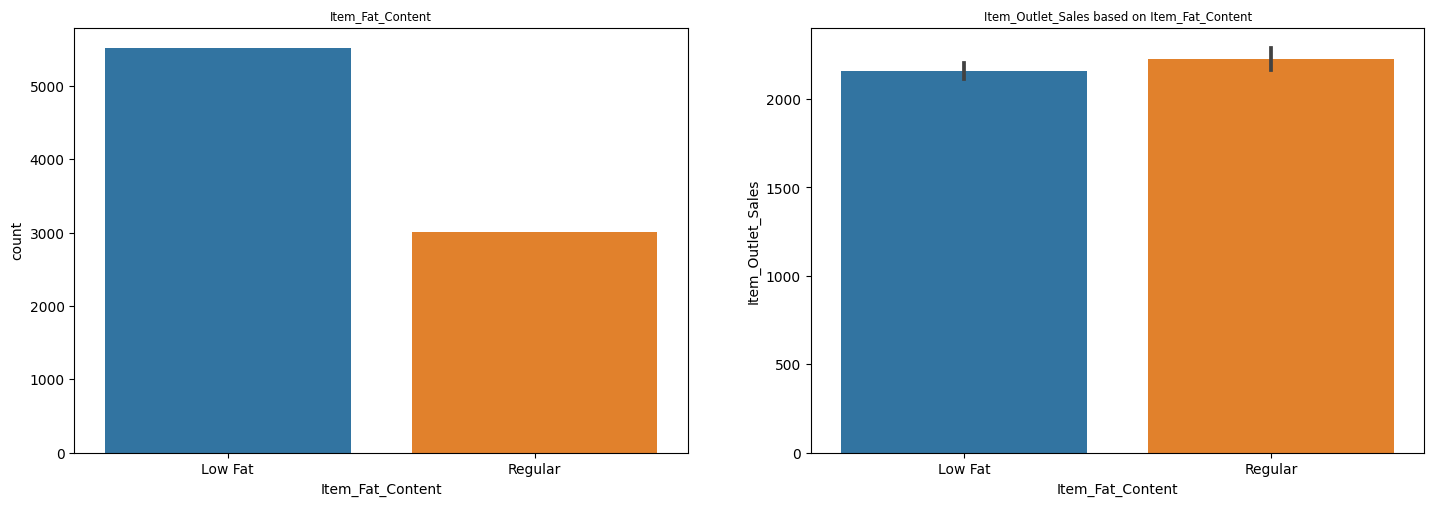

In [77]:
# Visualization Item_Fat_Content feature
plt.figure(figsize=(15, 5))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(121)
plt.title("Item_Fat_Content", fontsize="small")
histo = data["Item_Fat_Content"].value_counts()
print(histo)
sns.countplot(x = data["Item_Fat_Content"])
fig = plt.gcf()

plt.subplot(122)
plt.title("Item_Outlet_Sales based on Item_Fat_Content", fontsize="small")
sns.barplot(data, x=data["Item_Fat_Content"], y=data["Item_Outlet_Sales"])
fig = plt.gcf()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


<Figure size 640x480 with 0 Axes>

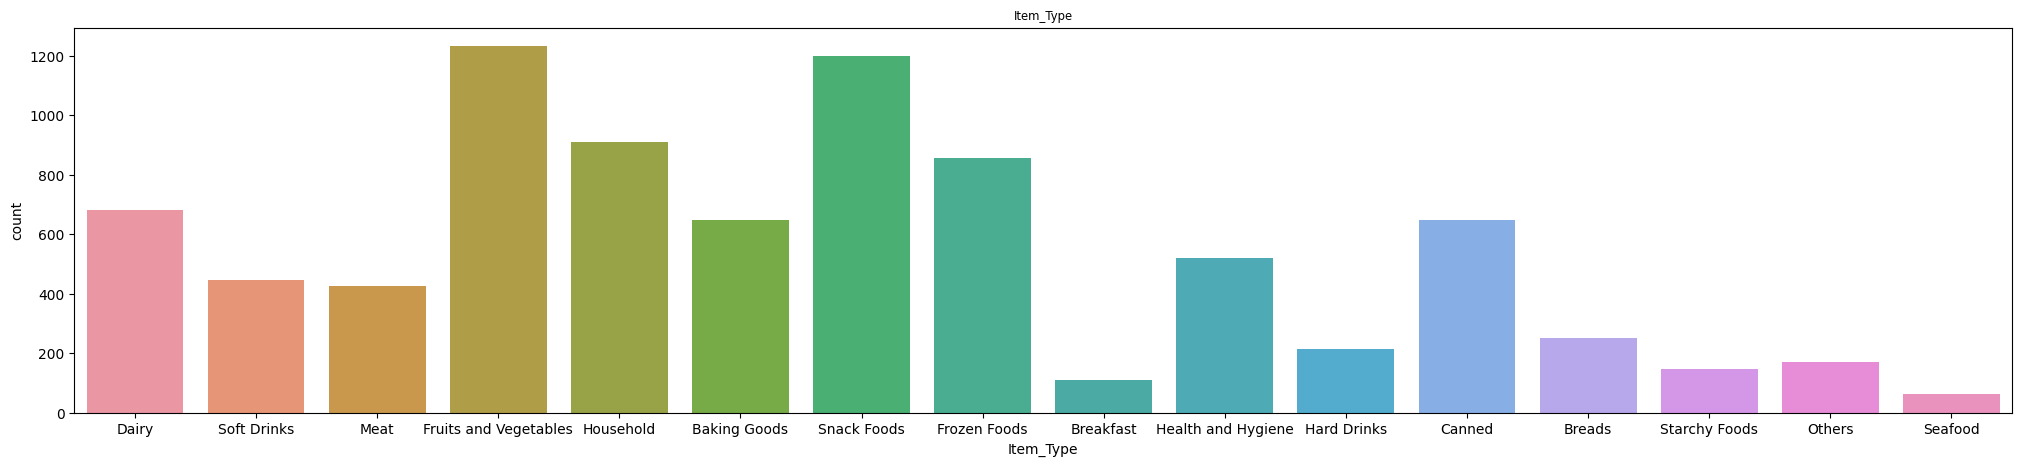

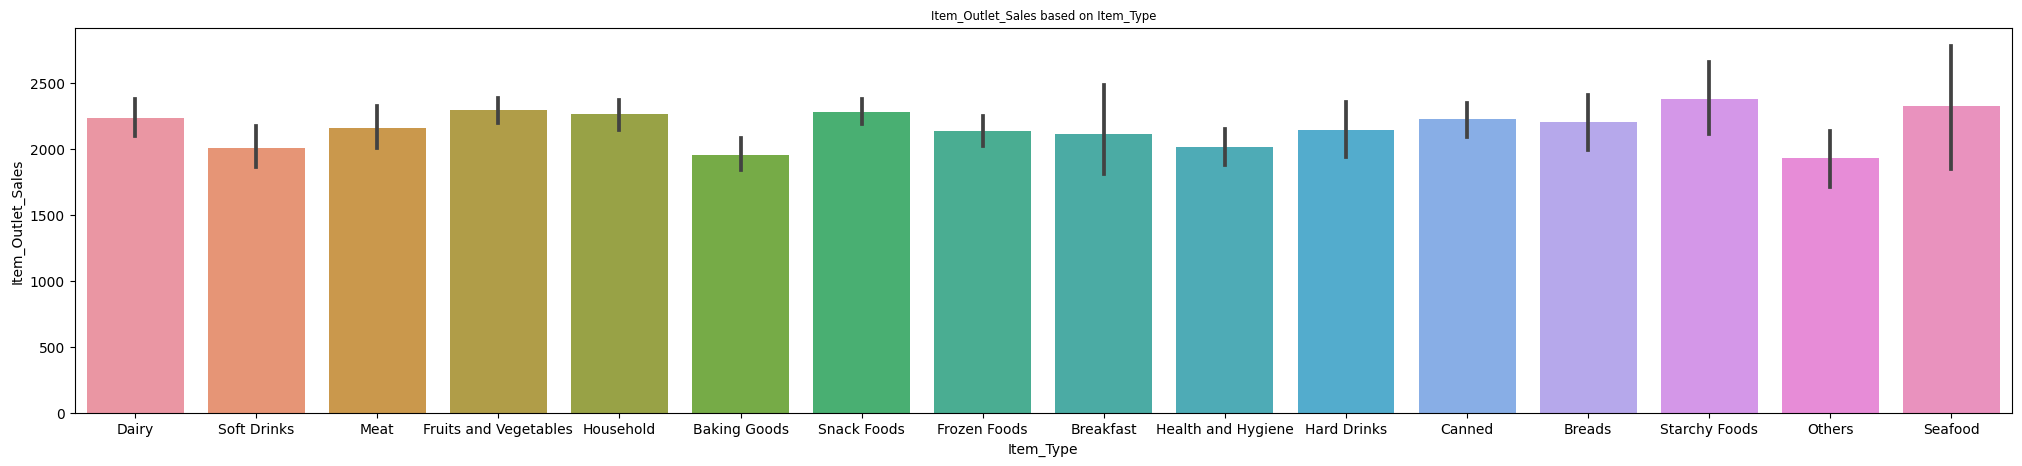

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


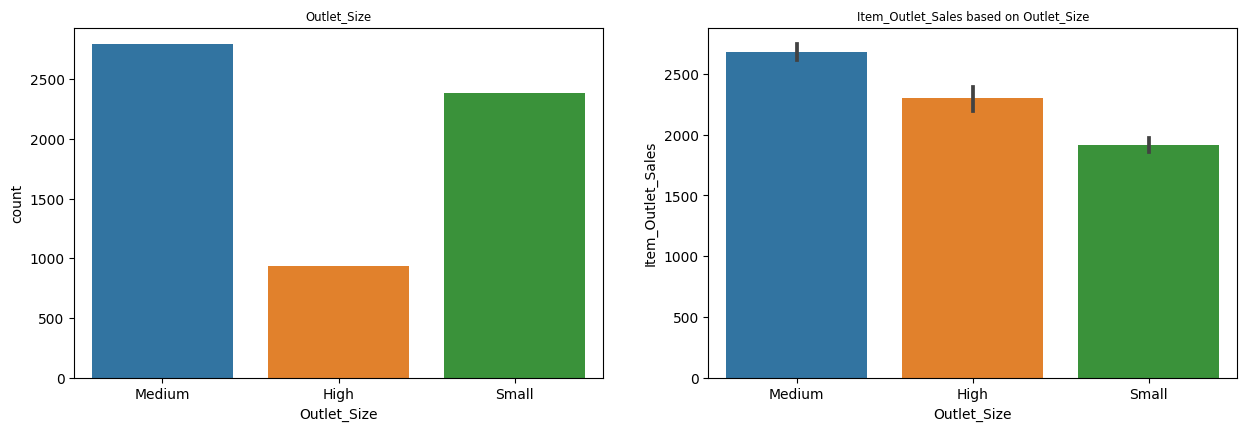

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


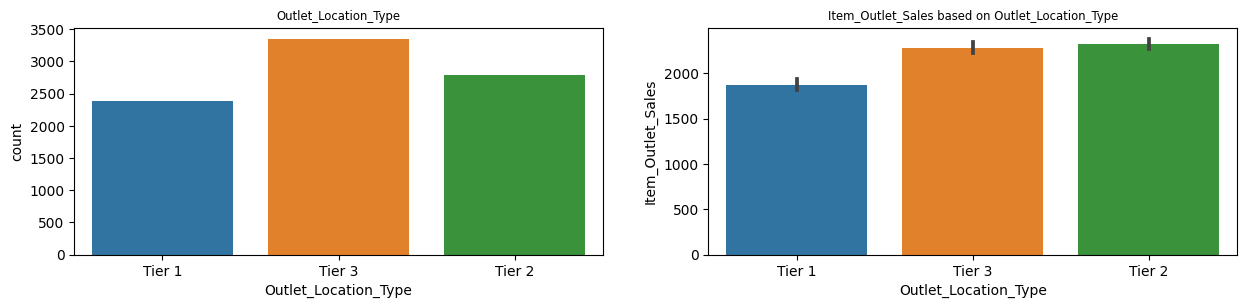

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


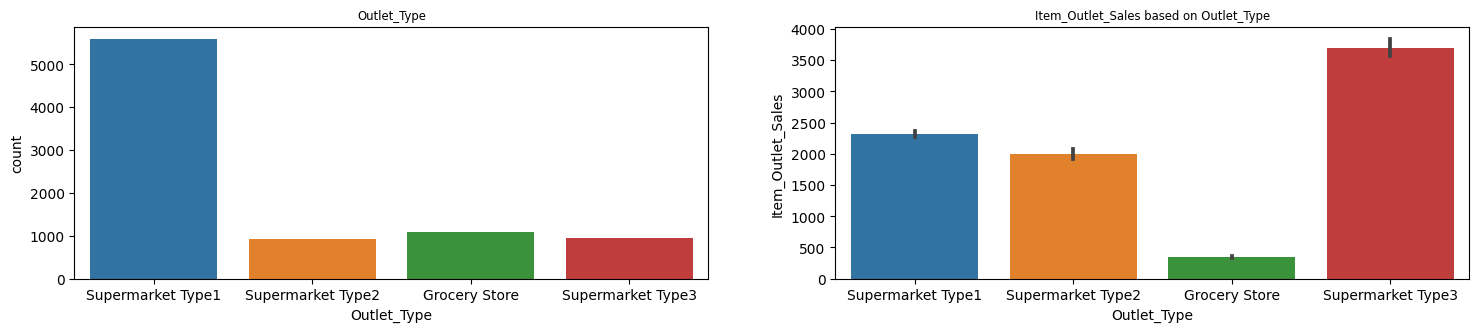

In [78]:
# ------------------Visualization Item_Type feature----------------------------
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.figure(figsize=(25, 5))
# plt.subplot(121)
plt.title("Item_Type", fontsize="small")
histo = data["Item_Type"].value_counts()
print(histo)
sns.countplot(x = data["Item_Type"])
fig = plt.gcf()
plt.show()

# plt.subplot(122)
plt.figure(figsize=(25, 5))
plt.title("Item_Outlet_Sales based on Item_Type", fontsize="small")
sns.barplot(data, x=data["Item_Type"], y=data["Item_Outlet_Sales"])
fig = plt.gcf()
plt.show()
# -----------------------------------------------------------------------------
# ------------------Visualization Outlet_Size feature--------------------------
plt.figure(figsize=(15, 10))
plt.rc('axes', titlesize=10)        # Controls Axes Title
plt.rc('axes', labelsize=10)        # Controls Axes Labels
plt.rc('xtick', labelsize=10)       # Controls x Tick Labels
plt.rc('ytick', labelsize=10)       # Controls y Tick Labels

plt.subplot(221)
plt.title("Outlet_Size", fontsize="small")
histo = data["Outlet_Size"].value_counts()
print(histo)
sns.countplot(x = data["Outlet_Size"])
fig = plt.gcf()

plt.subplot(222)
plt.title("Item_Outlet_Sales based on Outlet_Size", fontsize="small")
sns.barplot(data, x=data["Outlet_Size"], y=data["Item_Outlet_Sales"])
fig = plt.gcf()
plt.show()
# -----------------------------------------------------------------------------
# -------------Visualization Outlet_Location_Type feature----------------------
plt.figure(figsize=(15, 10))
plt.rc('axes', titlesize=10)        # Controls Axes Title
plt.rc('axes', labelsize=10)        # Controls Axes Labels
plt.rc('xtick', labelsize=10)       # Controls x Tick Labels
plt.rc('ytick', labelsize=10)       # Controls y Tick Labels

plt.subplot(321)
plt.title("Outlet_Location_Type", fontsize="small")
histo = data["Outlet_Location_Type"].value_counts()
print(histo)
sns.countplot(x = data["Outlet_Location_Type"])
fig = plt.gcf()

plt.subplot(322)
plt.title("Item_Outlet_Sales based on Outlet_Location_Type", fontsize="small")
sns.barplot(data, x=data["Outlet_Location_Type"], y=data["Item_Outlet_Sales"])
fig = plt.gcf()
plt.show()
# -----------------------------------------------------------------------------
# -------------------------Visualization Outlet_Type---------------------------
plt.figure(figsize=(18, 15))
plt.rc('axes', titlesize=10)        # Controls Axes Title
plt.rc('axes', labelsize=10)        # Controls Axes Labels
plt.rc('xtick', labelsize=10)       # Controls x Tick Labels
plt.rc('ytick', labelsize=10)       # Controls y Tick Labels

plt.subplot(421)
plt.title("Outlet_Type", fontsize="small")
histo = data["Outlet_Type"].value_counts()
print(histo)
sns.countplot(x = data["Outlet_Type"])
fig = plt.gcf()

plt.subplot(422)
plt.title("Item_Outlet_Sales based on Outlet_Type", fontsize="small")
sns.barplot(data, x=data["Outlet_Type"], y=data["Item_Outlet_Sales"])
fig = plt.gcf()
plt.show()

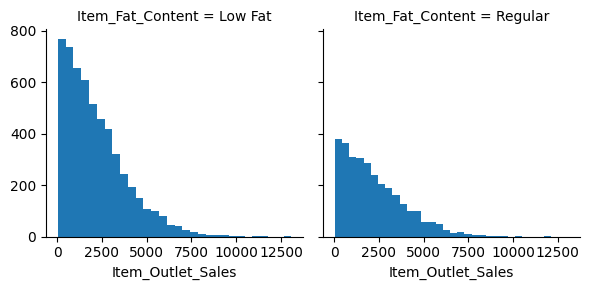

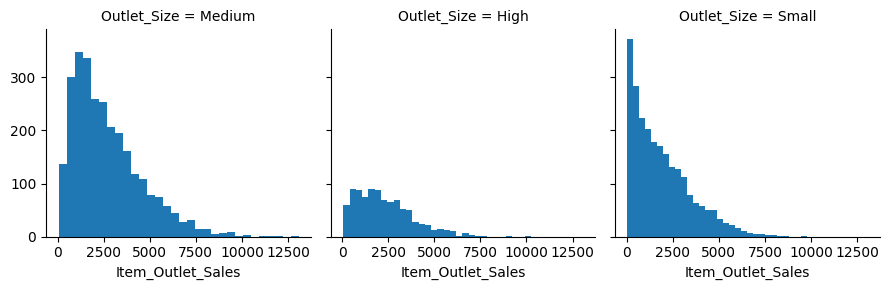

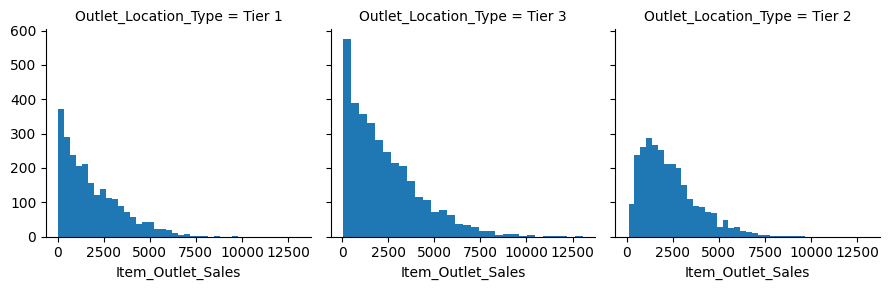

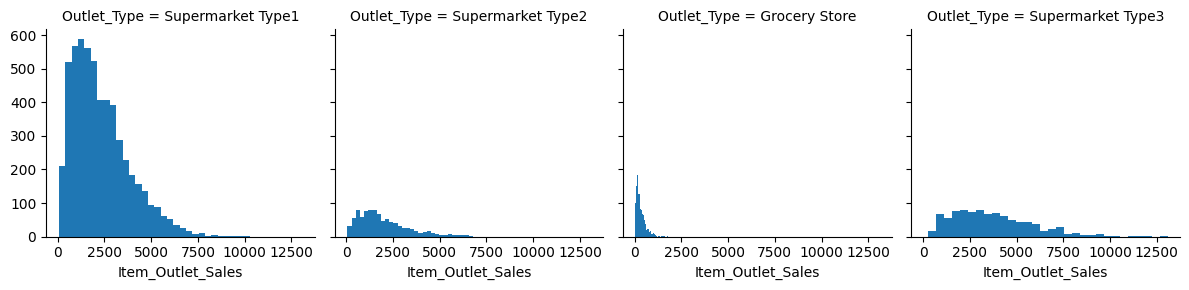

In [79]:
# Visualising the Item_Fat_Content based Item_Outlet_Sales
v1 = sns.FacetGrid(data, col='Item_Fat_Content')
v1.map(plt.hist, 'Item_Outlet_Sales', bins=30)
plt.show()

# Visualising the Outlet_Size based Item_Outlet_Sales
v2 = sns.FacetGrid(data, col='Outlet_Size')
v2.map(plt.hist, 'Item_Outlet_Sales', bins=30)
plt.show()

# Visualising the Outlet_Location_Type based Item_Outlet_Sales
v3 = sns.FacetGrid(data, col='Outlet_Location_Type')
v3.map(plt.hist, 'Item_Outlet_Sales', bins=30)
plt.show()

# Visualising the Outlet_Type based Item_Outlet_Sales
v4 = sns.FacetGrid(data, col='Outlet_Type')
v4.map(plt.hist, 'Item_Outlet_Sales', bins=30)
plt.show()

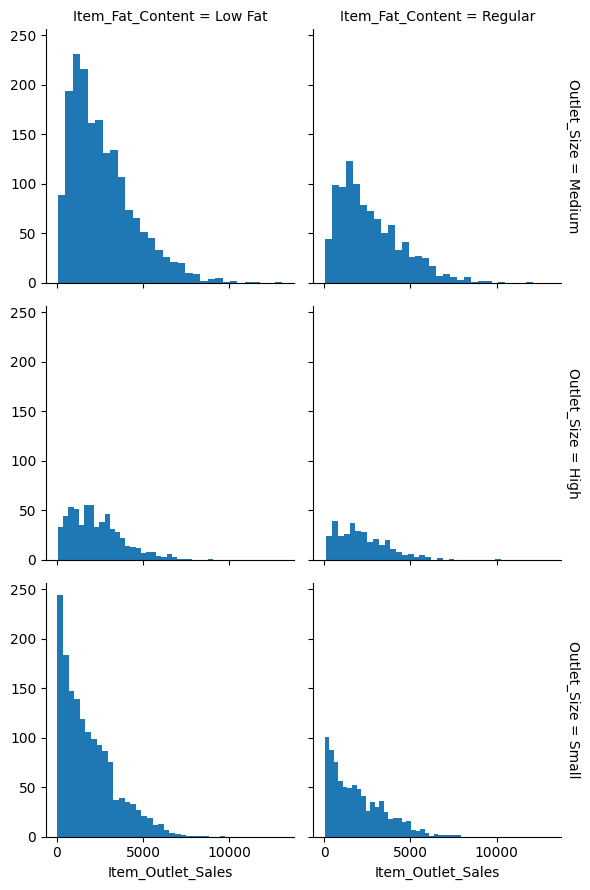

In [80]:
# Visualising the Item_Fat_Content based on Outlet_Size and Item_Outlet_Sales
v5 = sns.FacetGrid(data, col='Item_Fat_Content', row='Outlet_Size', margin_titles=True)
v5.map(plt.hist, 'Item_Outlet_Sales', bins=30)

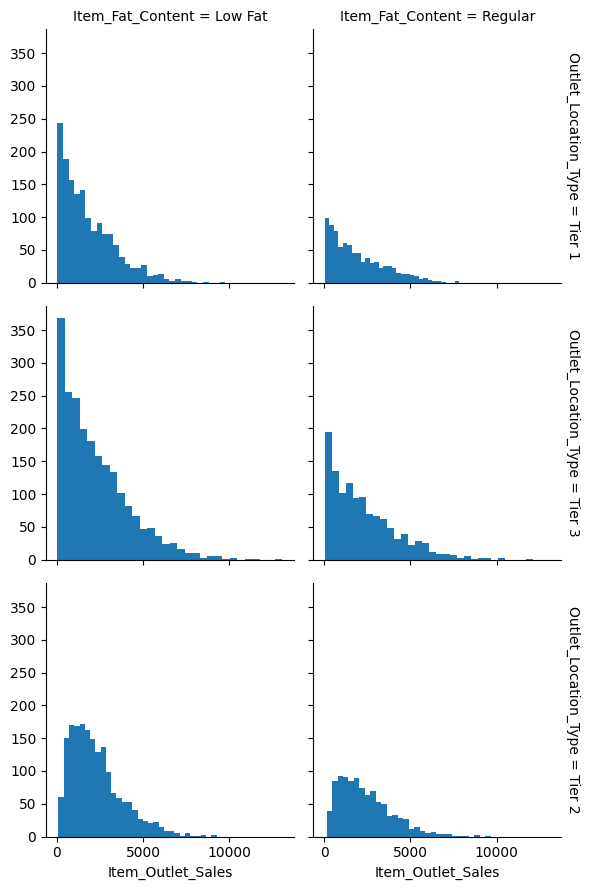

In [81]:
# Visualising the Item_Fat_Content based on Outlet_Location_Type and Item_Outlet_Sales
v6 = sns.FacetGrid(data, col='Item_Fat_Content', row='Outlet_Location_Type', margin_titles=True)
v6.map(plt.hist, 'Item_Outlet_Sales', bins=30)

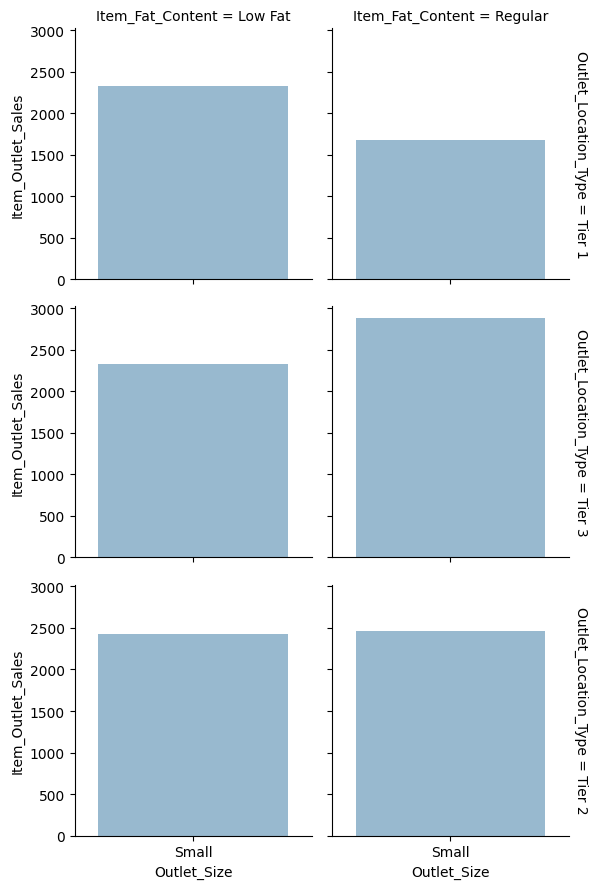

In [82]:
# Visualising Item_Fat_Content based on Outlet_Size, Item_Outlet_Sales, and Outlet_Location_Type
warnings.filterwarnings("ignore")
v7 = sns.FacetGrid(data, col='Item_Fat_Content', row='Outlet_Location_Type', margin_titles=True)
v7.map(sns.barplot, 'Outlet_Size', 'Item_Outlet_Sales', alpha=0.5, ci=None)
v7.add_legend()

# Preprocessing

## Filling missing values of numerical columns

missing values in numerical columns: 
 Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64


<Axes: >

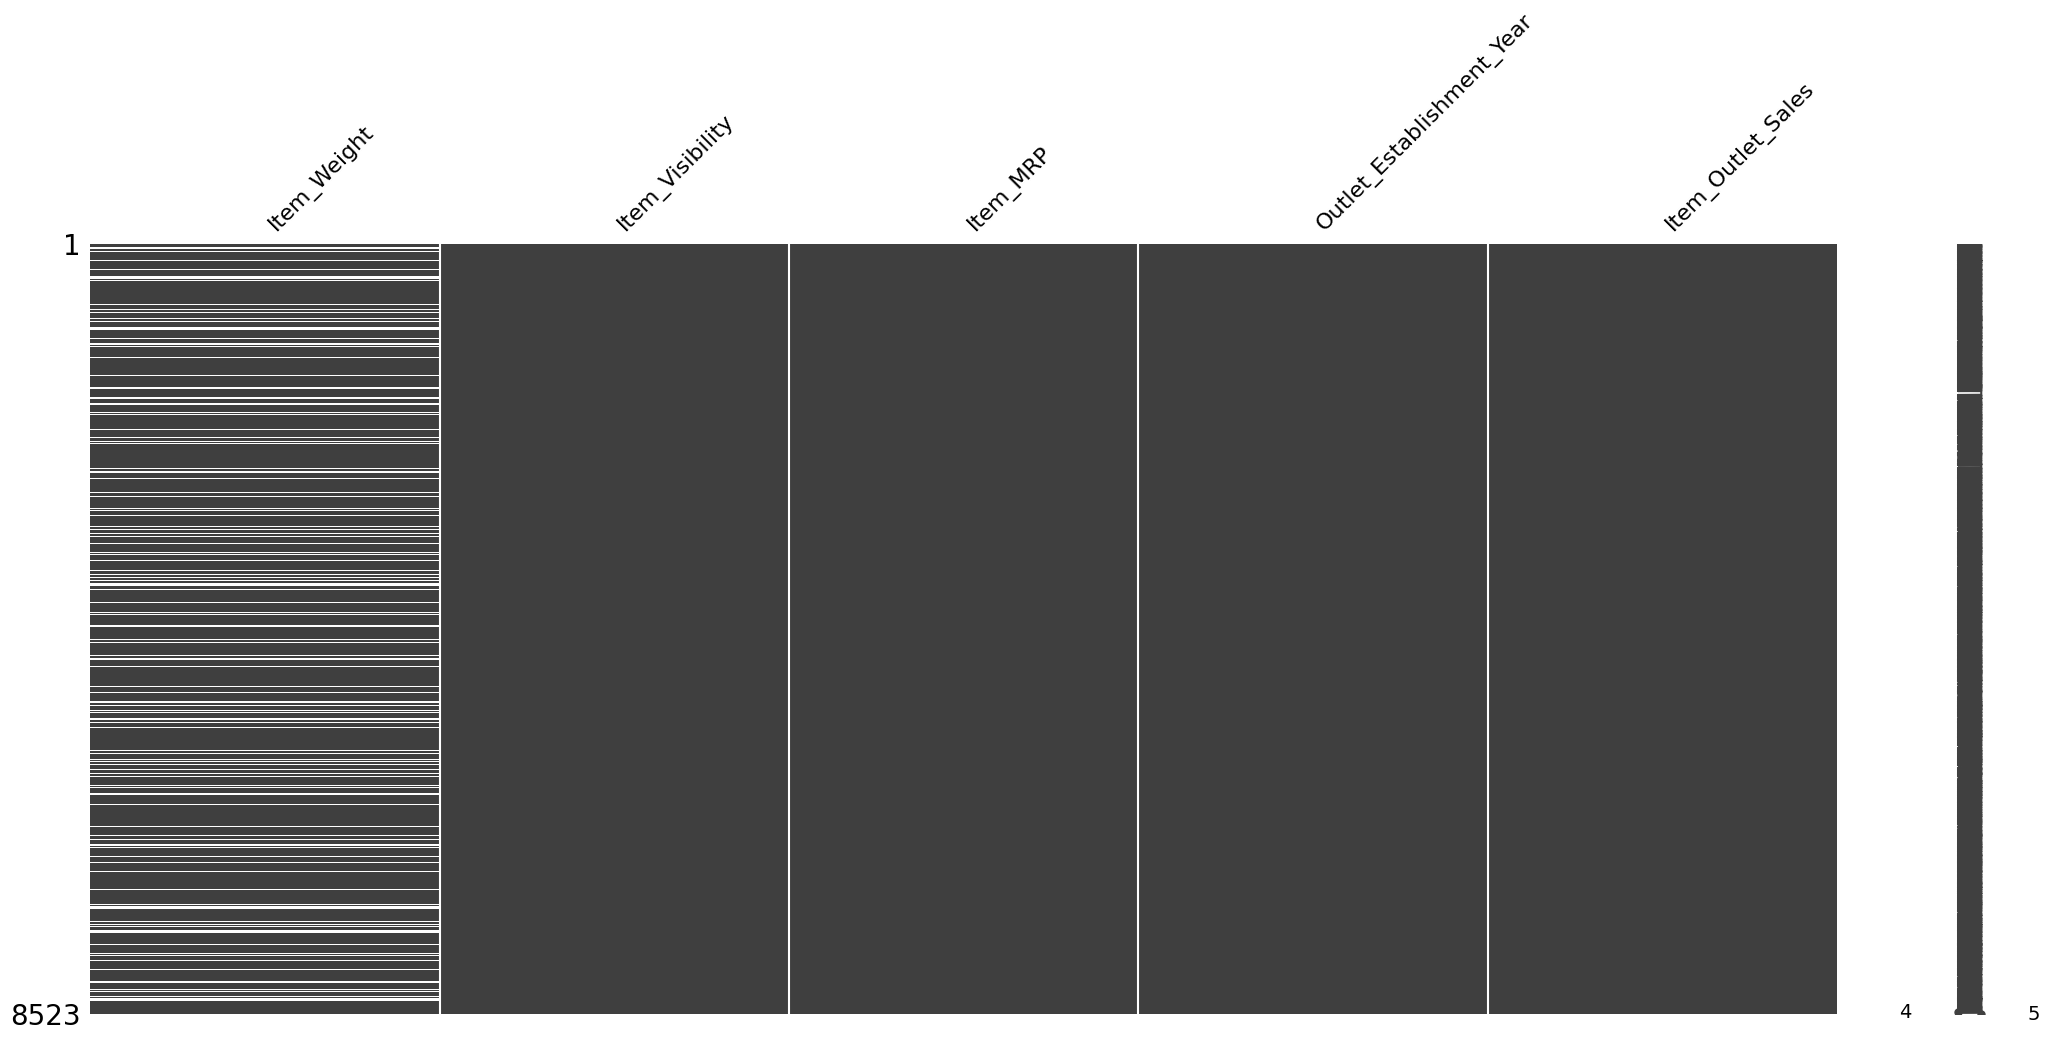

In [83]:
# Checking missing value
print("missing values in numerical columns: \n",df1.isna().sum())
msno.matrix(df1)



> Filling nulls in the Item Weight column by normal distribution (using mean and std).

> Using mean value is a good choice because Item Weight is not skewed. Moreover, this feature has no outliers.




In [84]:
# compute mean and std of `Item_Weight`
Item_Weight_mean = df1['Item_Weight'].mean()
Item_Weight_std = df1['Item_Weight'].std()

# number of NaN in `Item_Weight` column
num_na = df1['Item_Weight'].isna().sum()

# generate `num_na` samples from N(Item_Weight_mean, Item_Weight_std**2) distribution
rand_vals = Item_Weight_mean + Item_Weight_std * np.random.RandomState(42).randn(num_na)
# -------------------------------------------------------------------------------------------------------------------------------------
# since lower values from Item_Weight.min do not make sense, I decided to replace these values of rand_vals with Item_Weight.min
num = 0
while(num < len(rand_vals)):
    if rand_vals[num] < df1['Item_Weight'].min():
        rand_vals[num] = df1['Item_Weight'].min()
    num += 1
# /////////////////-----or-----/////////////////
'''
# since negative values of Item_Weight do not make sense, I decided to replace negative values of rand_vals with Item_Weight_mean
num = 0
while(num < len(rand_vals)):
    if rand_vals[num] < 0:
        rand_vals[num] = Item_Weight_mean
    num += 1
'''
# -------------------------------------------------------------------------------------------------------------------------------------
# replace missing values with `rand_vals`
df1.loc[df1['Item_Weight'].isna(), 'Item_Weight'] = rand_vals

<Axes: >

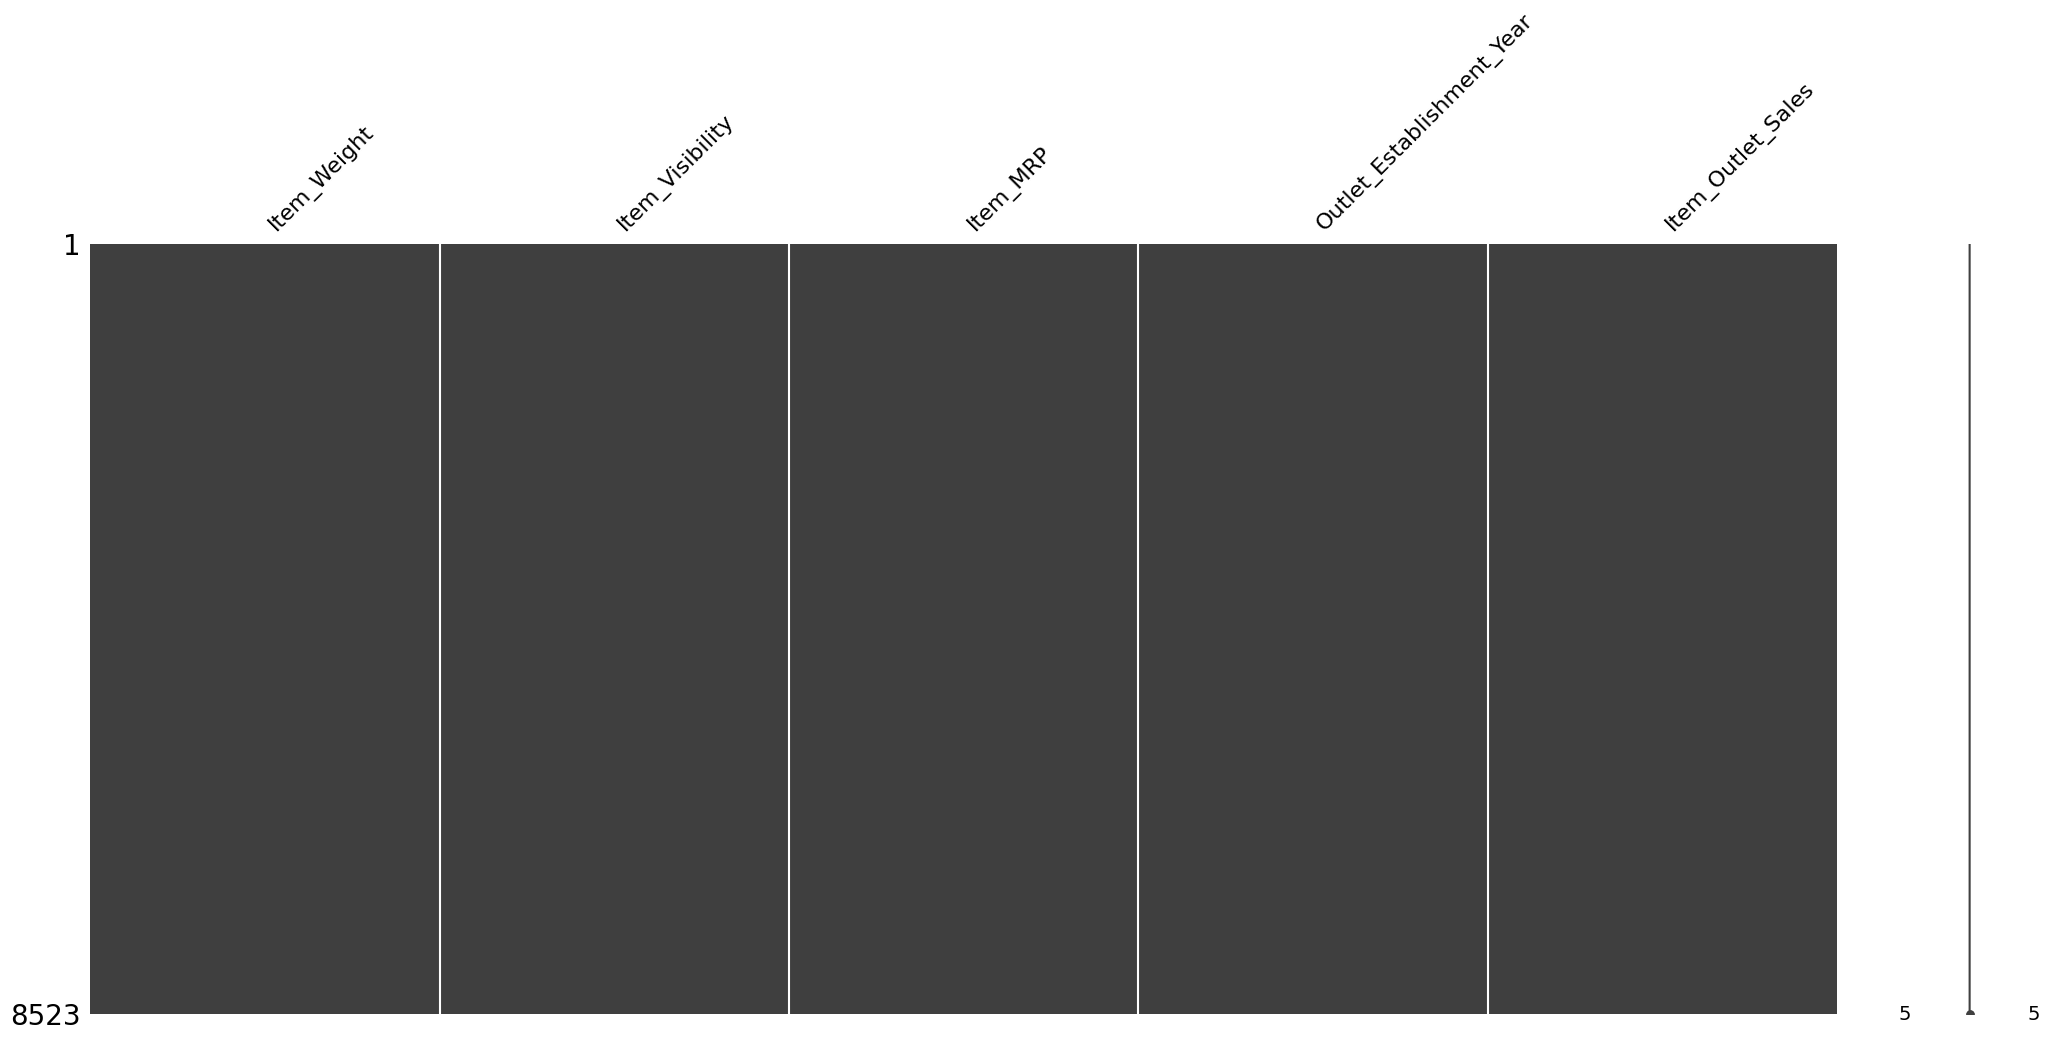

In [85]:
# Checking missing value again
msno.matrix(df1)

## Filling missing values of nominal columns

missing values in nominal columns: 
 Item_Fat_Content           0
Item_Type                  0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64


<Axes: >

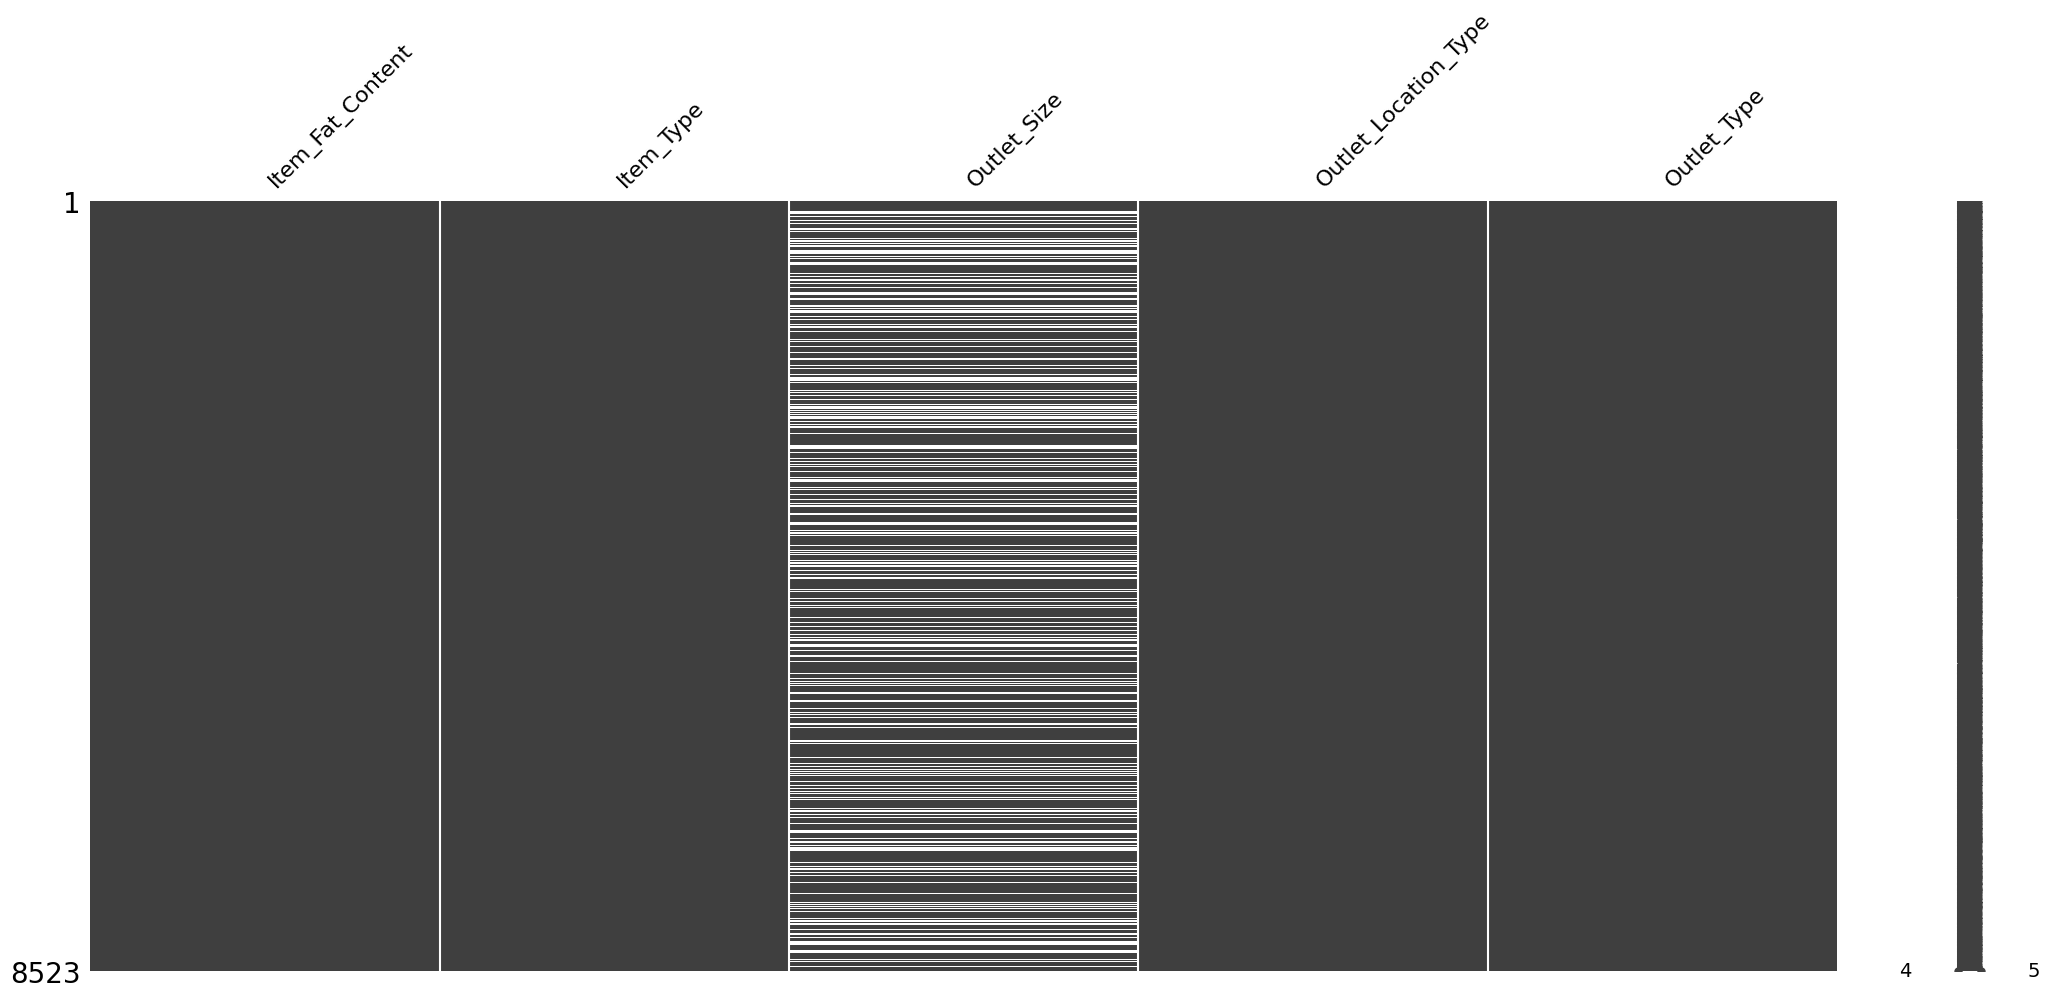

In [86]:
# Checking missing value
print("missing values in nominal columns: \n",df2.isna().sum())
msno.matrix(df2)


> Filling nulls in the Outlet_Size column by mode.

In [87]:
df2['Outlet_Size']=df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0])

#/////////////////////////////////// or \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

'''
mode_outlet_size = df2.pivot_table(values= 'Outlet_Size', columns= 'Outlet_Type', aggfunc= (lambda x: x.mode()[0]))
print(mode_outlet_size)

df2.loc[df2['Outlet_Size'].isnull(), 'Outlet_Size'] = df2.loc[df2['Outlet_Size'].isnull(), 'Outlet_Type'].apply(lambda x: mode_outlet_size[x].Outlet_Size)
'''

"\nmode_outlet_size = df2.pivot_table(values= 'Outlet_Size', columns= 'Outlet_Type', aggfunc= (lambda x: x.mode()[0]))\nprint(mode_outlet_size)\n\ndf2.loc[df2['Outlet_Size'].isnull(), 'Outlet_Size'] = df2.loc[df2['Outlet_Size'].isnull(), 'Outlet_Type'].apply(lambda x: mode_outlet_size[x].Outlet_Size)\n"

missing values in nominal columns: 
 Item_Fat_Content        0
Item_Type               0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64


<Axes: >

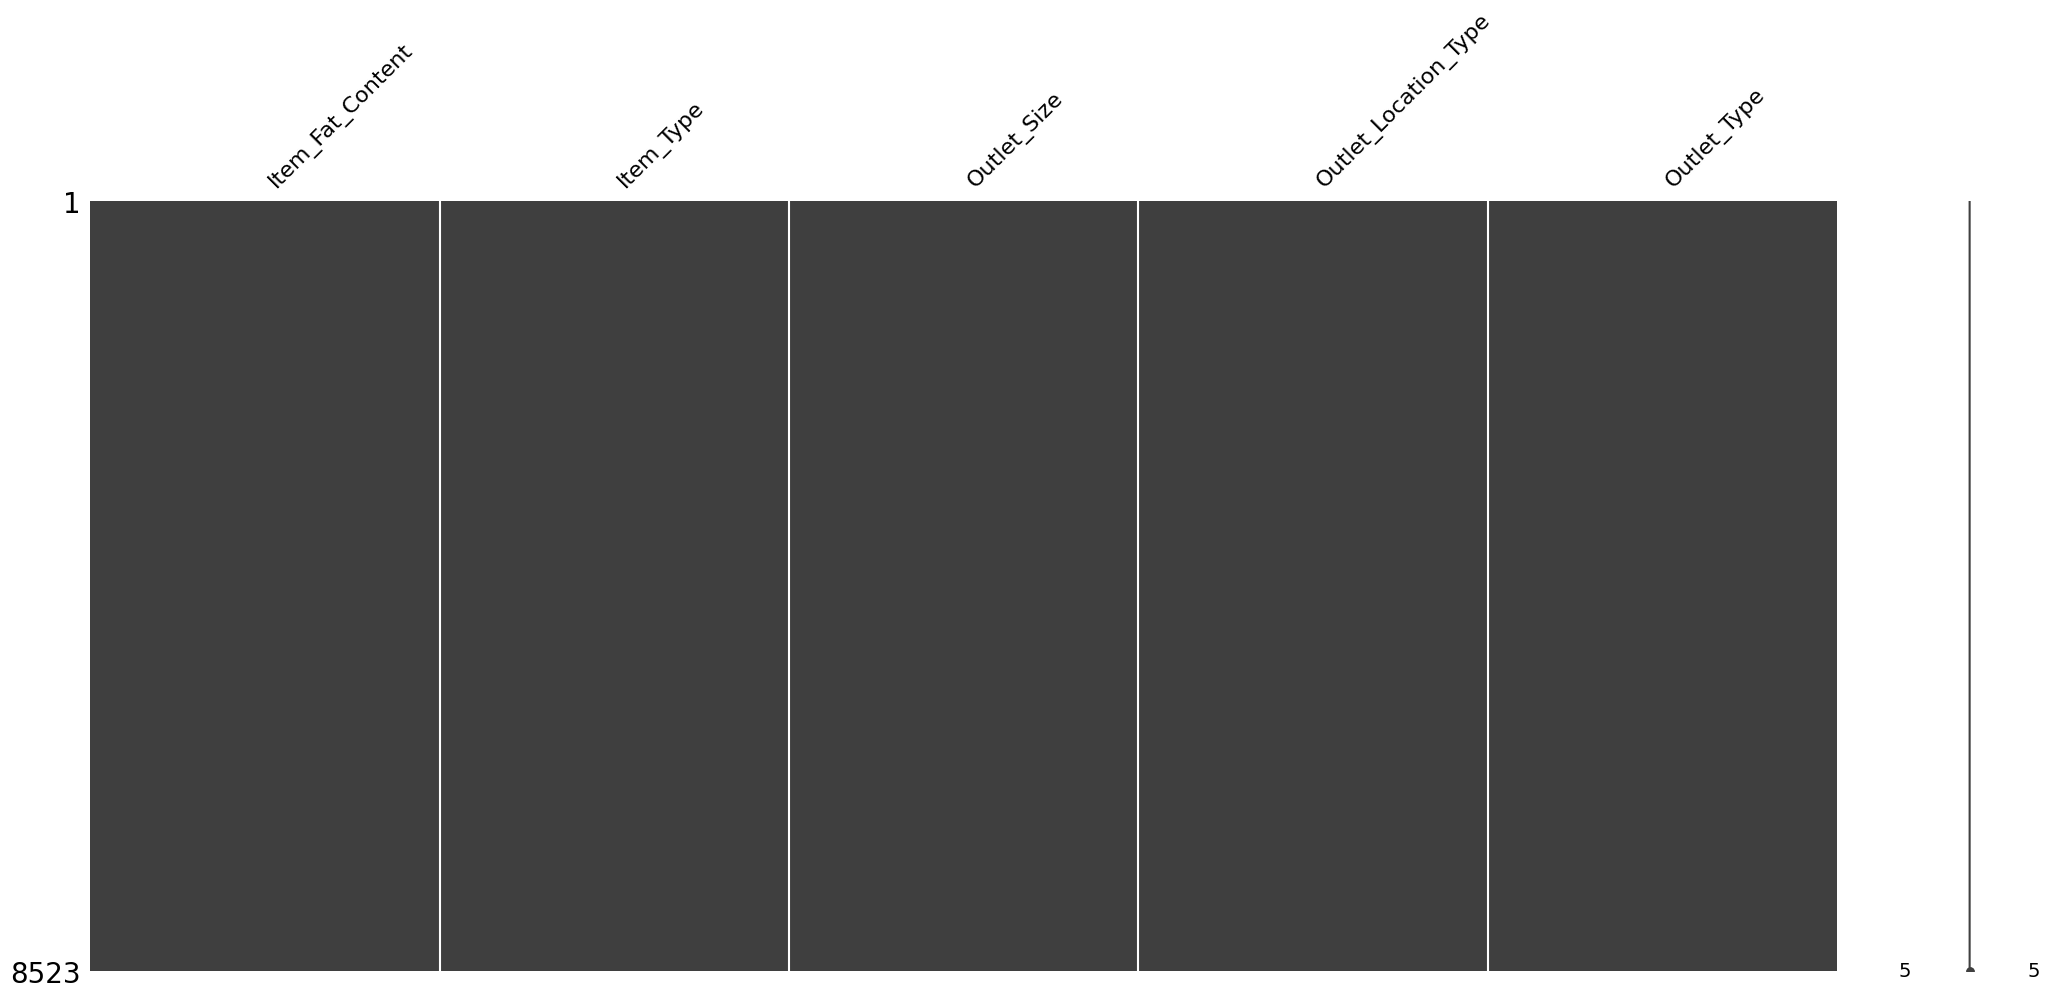

In [88]:
# Checking missing value again
print("missing values in nominal columns: \n",df2.isna().sum())
msno.matrix(df2)

## Label Encoding nominal columns by using pd.get_dummies

In [89]:
# df2 = pd.get_dummies(df2)
df2 = pd.get_dummies(df2, drop_first=True)

## Normalization

In [90]:
data=df1.join(df2)

In [91]:
X = data.drop(["Item_Outlet_Sales"], axis = 1)
y = data.loc[:, "Item_Outlet_Sales"].values

In [92]:
from sklearn.model_selection import train_test_split

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# using StandardScaler or MinMaxScaler()
# sc = StandardScaler()
MinMax = MinMaxScaler()
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

# Model selection

## Linear Regression

In [94]:
%%time
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

CPU times: user 16.5 ms, sys: 3.06 ms, total: 19.6 ms
Wall time: 23 ms


LinearRegression()

In [95]:
# coefficients & intercept

# print('coefficients:', lin_reg.coef_)
# ////////////----or----///////////////
NE_regression = pd.DataFrame(
    {
        "Weights": pd.Series(lin_reg.coef_, index=X.columns),
    }
)
print('intercept:', lin_reg.intercept_)
NE_regression.transpose()

intercept: -458.4262697496338


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Weights,-98.299,-169.597,"3,725.952",908.184,74.864,-13.682,31.205,27.290,-99.269,-27.547,...,-7.477,-32.560,35.317,-926.339,-874.593,-234.049,-457.472,"1,488.113","1,239.445","3,846.042"




> Feature Importance



Outlet_Type_Supermarket Type3     3,846.042
Item_MRP                          3,725.952
Outlet_Type_Supermarket Type1     1,488.113
Outlet_Type_Supermarket Type2     1,239.445
Outlet_Establishment_Year           908.184
Item_Type_Seafood                   355.846
Item_Fat_Content_Regular             74.864
Item_Type_Fruits and Vegetables      48.089
Item_Type_Health and Hygiene         36.301
Item_Type_Starchy Foods              35.317
Item_Type_Breakfast                  31.205
Item_Type_Canned                     27.290
Item_Type_Hard Drinks                21.161
Item_Type_Household                  17.811
Item_Type_Others                     -3.053
Item_Type_Snack Foods                -7.477
Item_Type_Breads                    -13.682
Item_Type_Meat                      -14.003
Item_Type_Frozen Foods              -27.547
Item_Type_Soft Drinks               -32.560
Item_Weight                         -98.299
Item_Type_Dairy                     -99.269
Item_Visibility                 

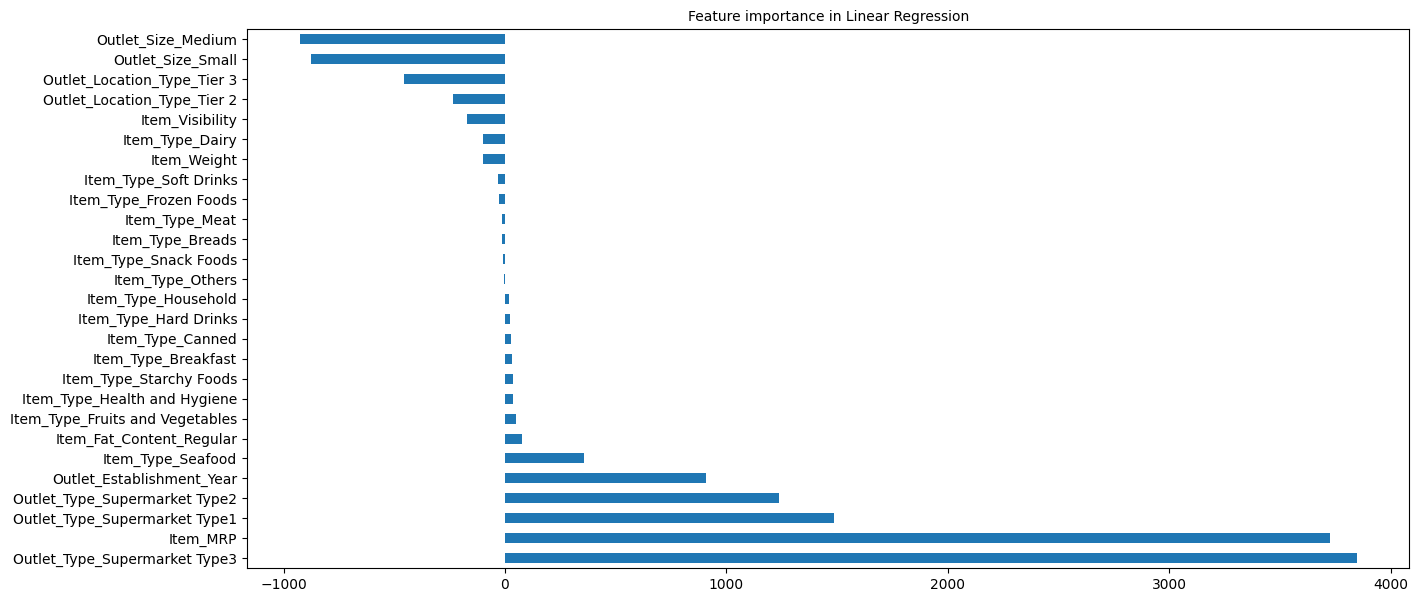

In [96]:
# Feature importance in Linear Regression
plt.figure(figsize=(15,7))
feature_importances_LR = pd.Series(lin_reg.coef_, index = X.columns)
feature_importances_LR.nlargest(data.shape[1]).plot(kind='barh');
plt.title("Feature importance in Linear Regression")
print(feature_importances_LR.sort_values(ascending= False), '\n\n')

In [97]:
# Also, for plotting feature importance, we can use two following codes

# plot Weights
def plot_coef(weight):
    plt.figure()
    plt.bar(np.arange(1, len(weight) + 1), height=np.abs(weight), color="g")
    plt.show()

In [98]:
'''
#plot Weights
plot_coef(lin_reg.coef_)
'''

'\n#plot Weights\nplot_coef(lin_reg.coef_)\n'



> Defining Function for Cross Validation



In [99]:
def cross_val(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv)
    #print(f'{model} Scores in Cross Validation:')
    for i in scores:
        print(round(i,2))
    #print(f'Average {model} score in Cross Validation: {round(scores.mean(),4)}')
    print(f'Average score in Cross Validation: {round(scores.mean(),4)}')

In [100]:
# ////////////////////////evaluation the model\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

# Make Prediction
y_pred = lin_reg.predict(X_test)

# score of linear regression
training_score_LR = lin_reg.score(X_train, y_train, sample_weight=None)
testing_score_LR  = lin_reg.score(X_test, y_test)
r2_score_LR       = r2_score(y_test, y_pred)
rmse_LR           = mean_squared_error(y_test, y_pred, squared=False)
print('The Training Accuracy of Linear Regression is: {:.4f}'.format(training_score_LR))
print("The Testing Accuracy of Linear Regression is: {:.4f}".format(testing_score_LR))
print('r2 score of Linear Regression is: {:.4f}'.format(r2_score_LR))
print('rmse of Linear Regression is: {:.4f}'.format(rmse_LR))
# r2_score is equal to model.score(X_test, y_test)
#------------------------------------------------------------------------------
# Cross Validation Score check
print("\nCross Validation:")
cross_val(lin_reg,X_train,y_train,5)

The Training Accuracy of Linear Regression is: 0.5607
The Testing Accuracy of Linear Regression is: 0.5676
r2 score of Linear Regression is: 0.5676
rmse of Linear Regression is: 1100.4595

Cross Validation:
0.57
0.55
0.54
0.57
0.54
Average score in Cross Validation: 0.5553


## Polynomial Regression

In [101]:
def fit_poly(x, y, degree=1):

    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)

    # create and fit the model by using pipeline
    linear_regression = LinearRegression()
    model_poly_reg = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model_poly_reg.fit(x, y)
    return model_poly_reg



> **The effect of different degrees in training the model:**





In [102]:
%%time
degrees = [2
#         ,3
#         ,4
           ]
print("Evaluation of Polynomial Regression: \n")
for d in degrees:
    # fit the model
    model_poly_reg = fit_poly(X_train, y_train, degree=d)
    # score of polynomial regression
    training_score_poly_reg = model_poly_reg.score(X_train, y_train, sample_weight=None)
    testing_score_poly_reg  = model_poly_reg.score(X_test, y_test)
    # make prediction
    y_pred = model_poly_reg.predict(X_test)
    #r2_score_poly_reg      = r2_score(y_test, y_pred)
    rmse_poly_reg           = mean_squared_error(y_test, y_pred, squared=False)
    print("degree={}, The Training Accuracy={:.4f}, The Testing Accuracy={:.4f}, RMSE={:.4f}, \n".format(d, training_score_poly_reg, testing_score_poly_reg, rmse_poly_reg))

print("\nCross Validation:")
cross_val(model_poly_reg,X,y,5)

Evaluation of Polynomial Regression: 

degree=2, The Training Accuracy=0.6200, The Testing Accuracy=0.5855, RMSE=1077.5500, 


Cross Validation:
0.6
0.57
0.57
0.59
0.6
Average score in Cross Validation: 0.5879
CPU times: user 2.91 s, sys: 1.17 s, total: 4.08 s
Wall time: 2.32 s




> In degrees > 2, the objective function in optimization is not converged. Thus, in d > 2, overfitting occurs. In this condition, testing accuracy has a bad value. Moreover, the Weights of the model are very high. Therefore, we have to use L1/l2 regularization.



In [103]:
#plot_coef(model_poly_reg.steps[1][1].coef_)

## L2- Regularization

In [104]:
def fit_poly_L2_reg(x, y, degree=1, lmbda=1.0):
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

    # create and fit the model
    l2_regression = Ridge(alpha=lmbda)
    model_l2_reg = Pipeline([("polynomial_features", polynomial_features), ("l2_reg", l2_regression)])
    model_l2_reg.fit(x, y)
    return model_l2_reg



> **The effect of different degrees in training the model:**





In [105]:
%%time
print("Evaluation of Ridge in different degrees: \n")
degrees = [2, 3, 4]
lmbda = 0.01
for d in degrees:
    # fit the model
    model_l2_reg = fit_poly_L2_reg(X_train, y_train, degree=d, lmbda=lmbda)
    # score of Ridge
    training_score_l2_reg = model_l2_reg.score(X_train, y_train, sample_weight=None)
    testing_score_l2_reg  = model_l2_reg.score(X_test, y_test)
    # make prediction
    y_pred = model_l2_reg.predict(X_test)
    #r2_score_l2_reg      = r2_score(y_test, y_pred)
    rmse_l2_reg           = mean_squared_error(y_test, y_pred, squared=False)
    print("degree={}, lmbda={}, The Training Accuracy={:.4f}, The Testing Accuracy={:.4f}, RMSE={:.4f}, \n".format(d, lmbda, training_score_l2_reg, testing_score_l2_reg, rmse_l2_reg))

Evaluation of Ridge in different degrees: 

degree=2, lmbda=0.01, The Training Accuracy=0.6200, The Testing Accuracy=0.5860, RMSE=1076.9138, 

degree=3, lmbda=0.01, The Training Accuracy=0.6629, The Testing Accuracy=0.5104, RMSE=1171.0830, 

degree=4, lmbda=0.01, The Training Accuracy=0.7254, The Testing Accuracy=0.3236, RMSE=1376.4734, 

CPU times: user 1min 23s, sys: 5.64 s, total: 1min 28s
Wall time: 54 s




> **The effect of different lmbdas in training the model:**

In [106]:
%%time
lmbdas = [1e-2, 1e-1, 1, 10, 100]
d = 2
print("Evaluation of Ridge in different lmbdas: \n")
for lmbda in lmbdas:
    model_l2_reg = fit_poly_L2_reg(X_train, y_train, degree=d, lmbda=lmbda)
    # score of Ridge
    training_score_l2_reg = model_l2_reg.score(X_train, y_train, sample_weight=None)
    testing_score_l2_reg  = model_l2_reg.score(X_test, y_test)
    # make prediction
    y_pred = model_l2_reg.predict(X_test)
    #r2_score_l2_reg      = r2_score(y_test, y_pred)
    rmse_l2_reg           = mean_squared_error(y_test, y_pred, squared=False)
    print("degree={}, lmbda={}, The Training Accuracy={:.4f}, The Testing Accuracy={:.4f}, RMSE={:.4f}, \n".format(d, lmbda, training_score_l2_reg, testing_score_l2_reg, rmse_l2_reg))

Evaluation of Ridge in different lmbdas: 

degree=2, lmbda=0.01, The Training Accuracy=0.6200, The Testing Accuracy=0.5860, RMSE=1076.9138, 

degree=2, lmbda=0.1, The Training Accuracy=0.6194, The Testing Accuracy=0.5872, RMSE=1075.3322, 

degree=2, lmbda=1, The Training Accuracy=0.6179, The Testing Accuracy=0.5897, RMSE=1071.9877, 

degree=2, lmbda=10, The Training Accuracy=0.6102, The Testing Accuracy=0.5925, RMSE=1068.3136, 

degree=2, lmbda=100, The Training Accuracy=0.5821, The Testing Accuracy=0.5835, RMSE=1080.1541, 

CPU times: user 949 ms, sys: 731 ms, total: 1.68 s
Wall time: 881 ms




> **Selecting the best degree & lmbda:**



In [107]:
d = 2
lmbda = 10

# fit
model_l2_reg = fit_poly_L2_reg(X_train, y_train, degree=d, lmbda=lmbda)
# score of Ridge
training_score_l2_reg = model_l2_reg.score(X_train, y_train, sample_weight=None)
testing_score_l2_reg  = model_l2_reg.score(X_test, y_test)
# make prediction
y_pred = model_l2_reg.predict(X_test)
#r2_score_l2_reg      = r2_score(y_test, y_pred)
rmse_l2_reg           = mean_squared_error(y_test, y_pred, squared=False)
print("degree={}, lmbda={}, The Training Accuracy={:.4f}, The Testing Accuracy={:.4f}, RMSE={:.4f}, \n".format(d, lmbda, training_score_l2_reg, testing_score_l2_reg, rmse_l2_reg))
# Cross Validation Score check
print("\nCross Validation:")
cross_val(model_l2_reg,X_train,y_train,5)

degree=2, lmbda=10, The Training Accuracy=0.6102, The Testing Accuracy=0.5925, RMSE=1068.3136, 


Cross Validation:
0.6
0.58
0.57
0.61
0.57
Average score in Cross Validation: 0.5859


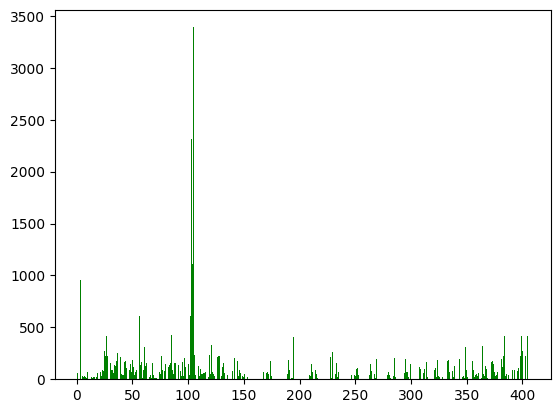

In [108]:
plot_coef(model_l2_reg.steps[1][1].coef_)

## L1- Regularization

In [109]:
def fit_poly_L1_reg(x, y, degree=1, lmbda=1.0):
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)

    # create and fit the model
    l1_regression = Lasso(alpha=lmbda)
    model_l1_reg = Pipeline([("polynomial_features", polynomial_features), ("l1_reg", l1_regression)])
    model_l1_reg.fit(x, y)
    return model_l1_reg



> **The effect of different degrees in training the model:**





In [110]:
%%time
print("Evaluation of Lasso in different degrees: \n")
degrees = [2,3,4]
lmbda = 0.01
for d in degrees:
    # fit the model
    model_l1_reg = fit_poly_L1_reg(X_train, y_train, degree=d, lmbda=lmbda)
    # score of Lasso
    training_score_l1_reg = model_l1_reg.score(X_train, y_train, sample_weight=None)
    testing_score_l1_reg  = model_l1_reg.score(X_test, y_test)
    # make prediction
    y_pred = model_l1_reg.predict(X_test)
    #r2_score_l1_reg      = r2_score(y_test, y_pred)
    rmse_l1_reg           = mean_squared_error(y_test, y_pred, squared=False)
    print("degree={}, lmbda={}, The Training Accuracy={:.4f}, The Testing Accuracy={:.4f}, RMSE={:.4f}, \n".format(d, lmbda, training_score_l1_reg, testing_score_l1_reg, rmse_l1_reg))

Evaluation of Lasso in different degrees: 

degree=2, lmbda=0.01, The Training Accuracy=0.6196, The Testing Accuracy=0.5871, RMSE=1075.3801, 

degree=3, lmbda=0.01, The Training Accuracy=0.6608, The Testing Accuracy=0.5204, RMSE=1159.0097, 

degree=4, lmbda=0.01, The Training Accuracy=0.7191, The Testing Accuracy=0.3580, RMSE=1341.0080, 

CPU times: user 1min 7s, sys: 2.86 s, total: 1min 10s
Wall time: 1min 9s




> **The effect of different lmbdas in training the model:**

In [111]:
%%time
print("Evaluation of Lasso in different lmbdas: \n")
lmbdas = [1e-2, 1e-1, 1, 10, 100]
d = 4
for lmbda in lmbdas:
    model_l1_reg = fit_poly_L1_reg(X_train, y_train, degree=d, lmbda=lmbda)
    # score of Lasso
    training_score_l1_reg = model_l1_reg.score(X_train, y_train, sample_weight=None)
    testing_score_l1_reg  = model_l1_reg.score(X_test, y_test)
    # make prediction
    y_pred = model_l1_reg.predict(X_test)
    #r2_score_l1_reg      = r2_score(y_test, y_pred)
    rmse_l1_reg           = mean_squared_error(y_test, y_pred, squared=False)
    print("degree={}, lmbda={}, The Training Accuracy={:.4f}, The Testing Accuracy={:.4f}, RMSE={:.4f}, \n".format(d, lmbda, training_score_l1_reg, testing_score_l1_reg, rmse_l1_reg))

Evaluation of Lasso in different lmbdas: 

degree=4, lmbda=0.01, The Training Accuracy=0.7191, The Testing Accuracy=0.3580, RMSE=1341.0080, 

degree=4, lmbda=0.1, The Training Accuracy=0.6655, The Testing Accuracy=0.5461, RMSE=1127.5032, 

degree=4, lmbda=1, The Training Accuracy=0.6167, The Testing Accuracy=0.5990, RMSE=1059.8397, 

degree=4, lmbda=10, The Training Accuracy=0.5978, The Testing Accuracy=0.6043, RMSE=1052.7839, 

degree=4, lmbda=100, The Training Accuracy=0.3769, The Testing Accuracy=0.3902, RMSE=1306.8848, 

CPU times: user 2min 2s, sys: 9.64 s, total: 2min 12s
Wall time: 2min 8s




> **Selecting the best degree & lmbda:**



In [112]:
d = 4
lmbda = 10

# fit
model_l1_reg = fit_poly_L1_reg(X_train, y_train, degree=d, lmbda=lmbda)
# score of Lasso
training_score_l1_reg = model_l1_reg.score(X_train, y_train, sample_weight=None)
testing_score_l1_reg  = model_l1_reg.score(X_test, y_test)
# make prediction
y_pred = model_l1_reg.predict(X_test)
#r2_score_l1_reg      = r2_score(y_test, y_pred)
rmse_l1_reg           = mean_squared_error(y_test, y_pred, squared=False)
print("degree={}, lmbda={}, The Training Accuracy={:.4f}, The Testing Accuracy={:.4f}, RMSE={:.4f}, \n".format(d, lmbda, training_score_l1_reg, testing_score_l1_reg, rmse_l1_reg))
print("\nCross Validation:")
cross_val(model_l1_reg,X_train,y_train,5)

degree=4, lmbda=10, The Training Accuracy=0.5978, The Testing Accuracy=0.6043, RMSE=1052.7839, 


Cross Validation:
0.61
0.6
0.58
0.61
0.58
Average score in Cross Validation: 0.5956


In [113]:
#plot_coef(model_l1_reg.steps[1][1].coef_)

## Xgboost Regression

In [114]:
%%time
XGB_reg = XGBRegressor()
# fit the model
XGB_reg.fit(X_train,y_train)

CPU times: user 1.92 s, sys: 31 ms, total: 1.95 s
Wall time: 1.02 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [115]:
# ////////////////////////evaluation the model\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

# Make Prediction
y_pred = XGB_reg.predict(X_test)

# score of XGboost regression
training_score_XGB = XGB_reg.score(X_train, y_train, sample_weight=None)
testing_score_XGB  = XGB_reg.score(X_test, y_test)
#r2_score_XGB      = r2_score(y_test, y_pred)
rmse_XGB           = mean_squared_error(y_test, y_pred, squared=False)
print('The Training Accuracy of XGB Regression is: {:.4f}'.format(training_score_XGB))
print("The Testing Accuracy of XGB Regression is: {:.4f}".format(testing_score_XGB))
#print('r2 score of XGB is: {:.4f}'.format(r2_score_XGB))
print('rmse of XGB Regression is: {:.4f}'.format(rmse_XGB))
# r2_score is equal to model.score(X_test, y_test)
print("\nCross Validation:")
cross_val(XGB_reg,X_train,y_train,5)

The Training Accuracy of XGB Regression is: 0.8753
The Testing Accuracy of XGB Regression is: 0.5188
rmse of XGB Regression is: 1160.9535

Cross Validation:
0.53
0.49
0.5
0.54
0.49
Average score in Cross Validation: 0.5096


Outlet_Type_Supermarket Type3     0.434
Outlet_Type_Supermarket Type1     0.231
Item_MRP                          0.055
Outlet_Establishment_Year         0.044
Item_Type_Starchy Foods           0.017
Item_Type_Breakfast               0.015
Item_Type_Hard Drinks             0.014
Item_Type_Frozen Foods            0.014
Item_Type_Breads                  0.013
Item_Fat_Content_Regular          0.013
Item_Type_Soft Drinks             0.012
Item_Type_Seafood                 0.011
Item_Type_Dairy                   0.011
Item_Type_Health and Hygiene      0.011
Item_Type_Meat                    0.010
Item_Visibility                   0.010
Item_Type_Household               0.009
Item_Type_Fruits and Vegetables   0.009
Item_Type_Snack Foods             0.009
Outlet_Size_Small                 0.009
Outlet_Size_Medium                0.009
Outlet_Location_Type_Tier 2       0.008
Item_Type_Canned                  0.008
Item_Weight                       0.008
Outlet_Location_Type_Tier 3       0.007


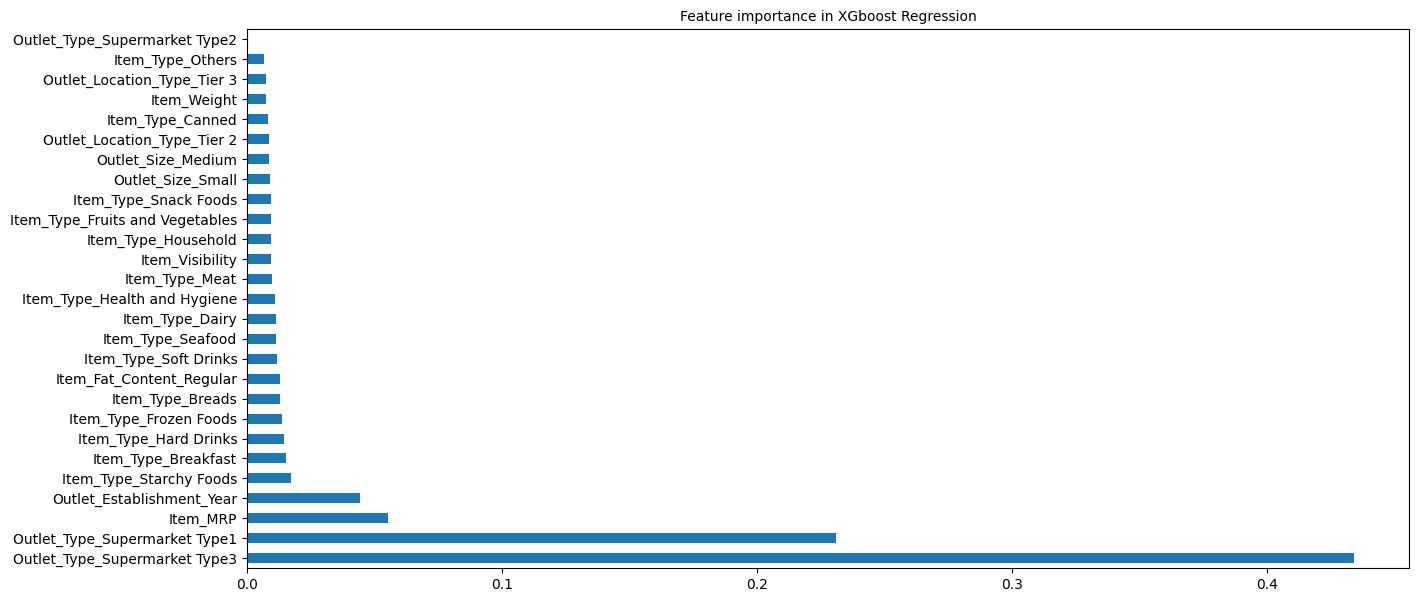

In [116]:
# Feature importance in XGboost Regression
plt.figure(figsize=(15,7))
feature_importances_XGB = pd.Series(XGB_reg.feature_importances_, index = X.columns)
feature_importances_XGB.nlargest(data.shape[1]).plot(kind='barh');
plt.title("Feature importance in XGboost Regression")
print(feature_importances_XGB.sort_values(ascending= False), '\n\n')

## Random Forest Regression

In [117]:
%%time
RF_reg = RandomForestRegressor(max_depth=10)
# fit the model
RF_reg.fit(X_train,y_train)

CPU times: user 1.94 s, sys: 1.95 ms, total: 1.94 s
Wall time: 1.95 s


RandomForestRegressor(max_depth=10)

In [118]:
# ////////////////////////evaluation the model\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

# Make Prediction
y_pred = RF_reg.predict(X_test)

# score of Random Forest regression
training_score_RF_reg = RF_reg.score(X_train, y_train, sample_weight=None)
testing_score_RF_reg  = RF_reg.score(X_test, y_test)
#r2_score_RF_reg      = r2_score(y_test, y_pred)
rmse_RF_reg           = mean_squared_error(y_test, y_pred, squared=False)
print('The Training Accuracy of Random Forrest Regression is: {:.4f}'.format(training_score_RF_reg))
print("The Testing Accuracy of Random Forrest Regression is: {:.4f}".format(testing_score_RF_reg))
#print('r2 score of Random Forrest Regression is: {:.4f}'.format(r2_score_RF_reg))
print('rmse of Random Forrest Regression is: {:.4f}'.format(rmse_RF_reg))
# r2_score is equal to model.score(X_test, y_test)
print("\nCross Validation:")
cross_val(RF_reg,X_train,y_train,5)

The Training Accuracy of Random Forrest Regression is: 0.7513
The Testing Accuracy of Random Forrest Regression is: 0.5775
rmse of Random Forrest Regression is: 1087.8037

Cross Validation:
0.59
0.56
0.56
0.6
0.56
Average score in Cross Validation: 0.5743


Item_MRP                          0.494
Outlet_Type_Supermarket Type3     0.140
Outlet_Type_Supermarket Type1     0.127
Item_Visibility                   0.052
Outlet_Type_Supermarket Type2     0.048
Item_Weight                       0.047
Outlet_Establishment_Year         0.047
Item_Fat_Content_Regular          0.005
Item_Type_Soft Drinks             0.004
Item_Type_Fruits and Vegetables   0.004
Item_Type_Snack Foods             0.004
Item_Type_Dairy                   0.004
Item_Type_Household               0.003
Item_Type_Frozen Foods            0.003
Item_Type_Breakfast               0.002
Item_Type_Canned                  0.002
Outlet_Size_Small                 0.002
Item_Type_Meat                    0.002
Item_Type_Starchy Foods           0.002
Item_Type_Hard Drinks             0.002
Item_Type_Health and Hygiene      0.002
Item_Type_Seafood                 0.001
Outlet_Size_Medium                0.001
Item_Type_Breads                  0.001
Outlet_Location_Type_Tier 3       0.001


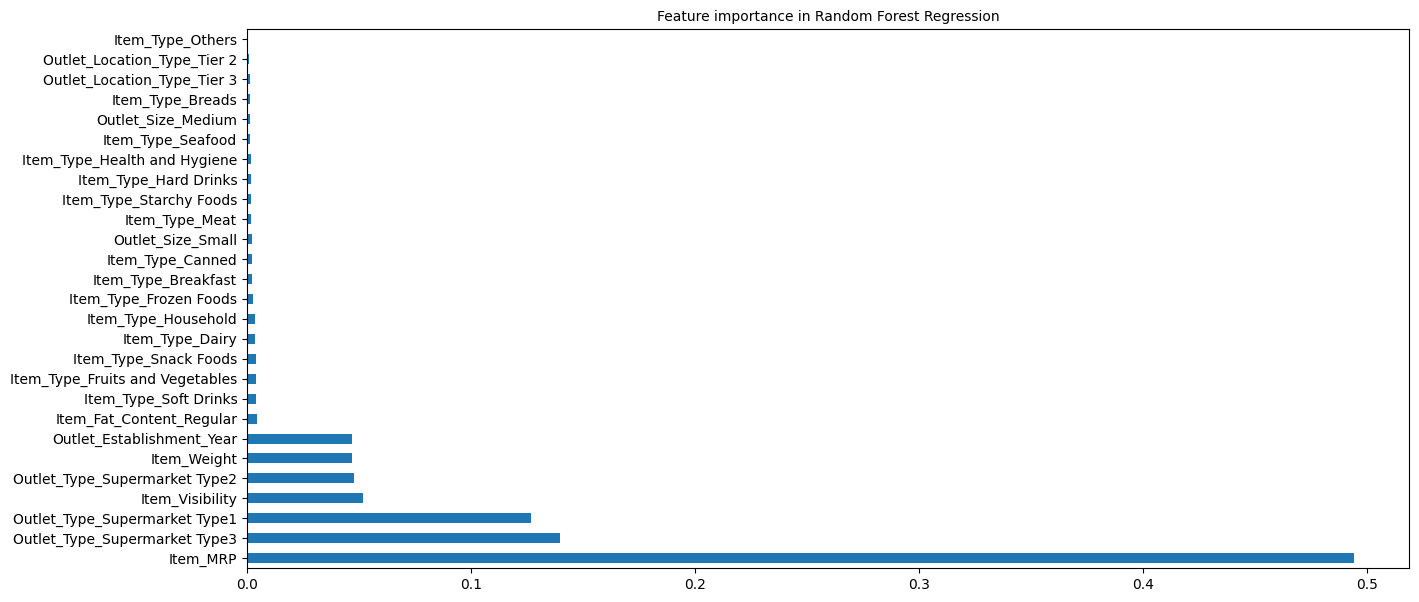

In [119]:
# Feature importance in Random Forrest
plt.figure(figsize=(15,7))
feature_importances_RF = pd.Series(RF_reg.feature_importances_, index = X.columns)
feature_importances_RF.nlargest(data.shape[1]).plot(kind='barh');
plt.title("Feature importance in Random Forest Regression")
print(feature_importances_RF.sort_values(ascending= False), '\n\n')

# Comparing all regressors

In [120]:
pd.options.display.float_format = '{:,.3f}'.format
comparing_all_regressors = pd.DataFrame({'Model':['Linear Regression', 'Polynomial Regression', 'Ridge', 'Lasso', 'XGB', 'Random Forrest'],
                          'Degree'               :["-",  2,  2,  4,  "-",  "-"],
                          'lambda'               :["-",  "-",  10,  10,  "-",  "-"],
                          'The Training Accuracy':[training_score_LR, training_score_poly_reg, training_score_l2_reg, training_score_l1_reg, training_score_XGB, training_score_RF_reg],
                          'The Testing Accuracy' :[testing_score_LR,  testing_score_poly_reg,  testing_score_l2_reg,  testing_score_l1_reg,  testing_score_XGB, testing_score_RF_reg],
                          'RMSE'                 :[rmse_LR,  rmse_poly_reg,  rmse_l2_reg,  rmse_l1_reg,  rmse_XGB, rmse_RF_reg]})

comparing_all_regressors

,Model,Degree,lambda,The Training Accuracy,The Testing Accuracy,RMSE
0,Linear Regression,-,-,0.561,0.568,"1,100.460"
1,Polynomial Regression,2,-,0.620,0.585,"1,077.550"
2,Ridge,2,10,0.610,0.593,"1,068.314"
3,Lasso,4,10,0.598,0.604,"1,052.784"
4,XGB,-,-,0.875,0.519,"1,160.954"
5,Random Forrest,-,-,0.751,0.578,"1,087.804"


# According to results, Lasso Regression by degree= 4 and lambda=10 is the best model for the Big Mart Sales Dataset.